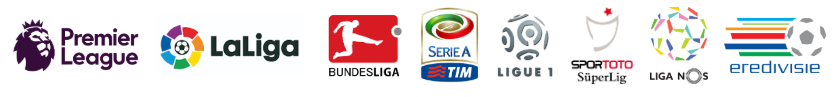

<center><img
src="https://www.myplaystationwallpapers.net/1920x1080/fifa-19-keyart-02.jpg" style="width:100%;height:100%;">
</center>

# Table of Contents
1. [**PACKAGES**](#section1)
2. [**DATA**](#section2)
    1. [Data Structure](#subsection1)
3. [**DATA MANIPULATION**](#section3)
    1. [Create League Variable & Sampling](#subsection2)
    2. [String Manipulation](#subsection3)
    3. [Create Position Class](#subsection4)
    4. [Height & Weight](#subsection5)
    5. [Correction of the Preferred Foot Variable](#subsection6)
    6. [Rename Some Variables](#subsection7)
    7. [Remove Unnecessary Variables Variables](#subsection8)
4. [**TIDY DATA**](#section4)
5. [**DATA ANALYSIS & VISUALIZATION**](#section5)
    1. [Finding Distribution and the Average of The Players in each League](#subsection9)
    2. [Total Market Value in each League](#subsection10)
    3. [Interactive World Map & Number of Player](#subsection11)
    4. [Comparison of the Two Players](#subsection12)
    5. [Visualization of the Position](#subsection13)
    6. [BMI - Body Mass Index](#subsection14)
    7. [Correlation](#subsection15)
    8. [Unpaired Two Sample Wilcoxon Test ](#subsection16)
    9. [Potential & Overall](#subsection17)
        1. [The Best Players from Paris Saint-Germain](#subsection18)
        2. [According to Age, Comparison Average Potential & Overall](#subsection19)
    10. [When will contracts expire in each league?](#subsection20)
    11. [The Most Powerful Clubs](#subsection21)
    12. [The Best Abilities of The Best Forward Players](#subsection22)
    13. [Distribution of the Position Class in every League](#subsection23)
    14. [Average summary statistics of players by position class in the Premier League](#subsection23)
    15. [Similar Players](#subsection24)
    16. [Relationship between Position and International Reputation variables](#subsection25)
    17. [Relationship between Age and Wage](#subsection26)
    18. [PCA Score vs Overall for Forward Players](#subsection27)
    19. [Clustering Forward Players with K-Means](#subsection28)
    20. [Average Overall & Age](#subsection29)
    21. [Top 10 Wonderkid](#subsection30)
6. [**MY OTHER NOTEBOOKS ABOUT SPORTS ANALYTICS**](#section6)


<a id="section1"></a>
# 1.PACKAGES

In [1]:
library(tidyverse) 
library(magrittr)
library(DataExplorer)
library(maps)
library(plotly)
library(DT)
library(tidytext)
library(gridExtra)
library(factoextra)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.0.9000     ✔ purrr   0.3.4     
✔ tibble  3.0.0          ✔ dplyr   0.8.5     
✔ tidyr   1.0.2          ✔ stringr 1.4.0     
✔ readr   1.3.1          ✔ forcats 0.5.0     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract



Attaching package: ‘maps’


The following object is masked from ‘package:purrr’:

    map



Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout


The following object is masked from ‘package:httr’:

    config



Att

In [2]:
options(scipen = 999)

<a id="section2"></a>
# 2.DATA

In [3]:
# Data Import
df <- read.csv("../input/fifa19/data.csv", encoding = "UTF-8")[-1]
head(df)

ID     Name              Age Photo                                         
1 158023 L. Messi          31  https://cdn.sofifa.org/players/4/19/158023.png
2  20801 Cristiano Ronaldo 33  https://cdn.sofifa.org/players/4/19/20801.png 
3 190871 Neymar Jr         26  https://cdn.sofifa.org/players/4/19/190871.png
4 193080 De Gea            27  https://cdn.sofifa.org/players/4/19/193080.png
5 192985 K. De Bruyne      27  https://cdn.sofifa.org/players/4/19/192985.png
6 183277 E. Hazard         27  https://cdn.sofifa.org/players/4/19/183277.png
  Nationality Flag                                Overall Potential
1 Argentina   https://cdn.sofifa.org/flags/52.png 94      94       
2 Portugal    https://cdn.sofifa.org/flags/38.png 94      94       
3 Brazil      https://cdn.sofifa.org/flags/54.png 92      93       
4 Spain       https://cdn.sofifa.org/flags/45.png 91      93       
5 Belgium     https://cdn.sofifa.org/flags/7.png  91      92       
6 Belgium     https://cdn.sofifa.org/flags/7.png  91      91       
  Club                Club.Logo                                    ⋯ Composure
1 FC Barcelona        https://cdn.sofifa.org/teams/2/light/241.png ⋯ 96       
2 Juventus            https://cdn.sofifa.org/teams/2/light/45.png  ⋯ 95       
3 Paris Saint-Germain https://cdn.sofifa.org/teams/2/light/73.png  ⋯ 94       
4 Manchester United   https://cdn.sofifa.org/teams/2/light/11.png  ⋯ 68       
5 Manchester City     https://cdn.sofifa.org/teams/2/light/10.png  ⋯ 88       
6 Chelsea             https://cdn.sofifa.org/teams/2/light/5.png   ⋯ 91       
  Marking StandingTackle SlidingTackle GKDiving GKHandling GKKicking
1 33      28             26             6       11         15       
2 28      31             23             7       11         15       
3 27      24             33             9        9         15       
4 15      21             13            90       85         87       
5 68      58             51            15       13          5       
6 34      27             22            11       12          6       
  GKPositioning GKReflexes Release.Clause
1 14             8         €226.5M       
2 14            11         €127.1M       
3 15            11         €228.1M       
4 88            94         €138.6M       
5 10            13         €196.4M       
6  8             8         €172.1M

<a id="subsection1"></a>
## 2.1.Data Structure 

There are 88 columns and 18207 observations on data.


In [4]:
dim(df)

[1] 18207    88

If you want to see more details about data. You can use the DataExplorer package. I think that there are some useful functions.

- introduce and plot_intro functions give us structure of the data.
- plot_missing function plots missing values of the data.

In [5]:
introduce(df)

rows  columns discrete_columns continuous_columns all_missing_columns
1 18207 88      45               43                 0                  
  total_missing_values complete_rows total_observations memory_usage
1 1836                 18147         1602216            10154392

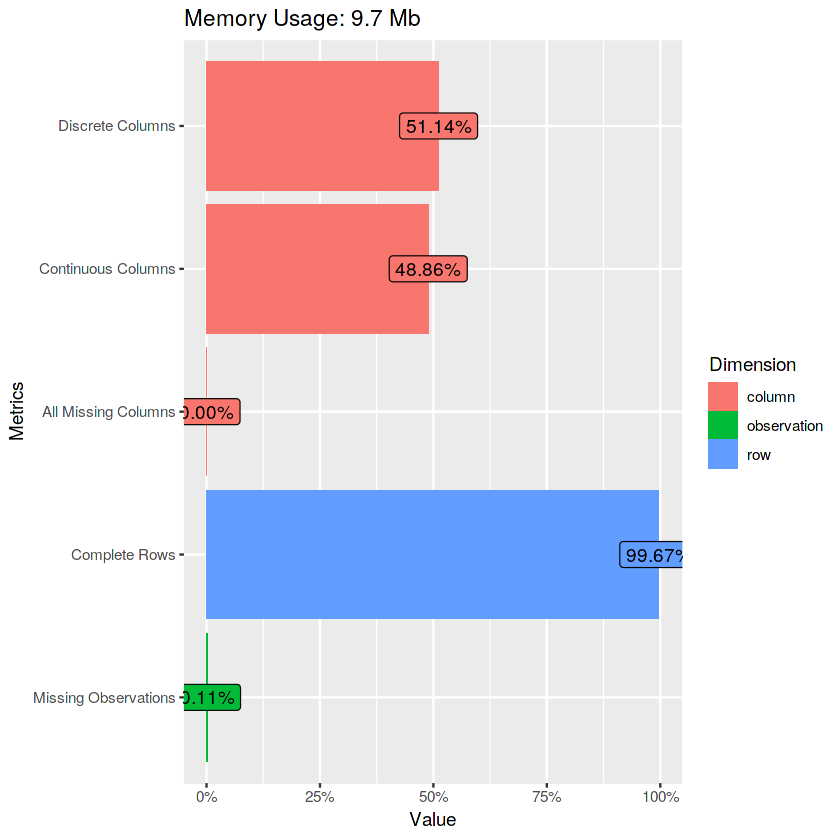

In [6]:
plot_intro(df)

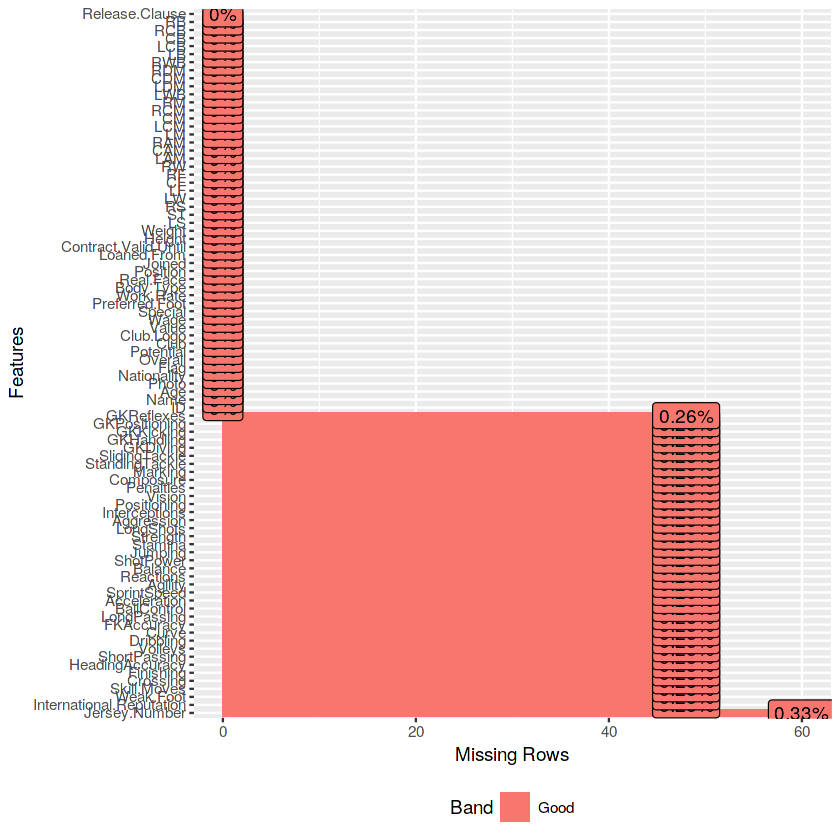

In [7]:
plot_missing(df)

<a id="section3"></a>
# 3.DATA MANIPULATION 

<a id="subsection2"></a>
## 3.1. Create League Variable & Sampling 

The data does not include league variable but we can extract leagues from Club variable.

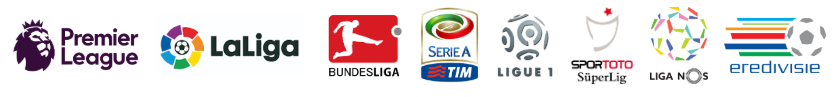

In [8]:
bundesliga <- c(
  "1. FC Nürnberg", "1. FSV Mainz 05", "Bayer 04 Leverkusen", "FC Bayern München",
  "Borussia Dortmund", "Borussia Mönchengladbach", "Eintracht Frankfurt",
  "FC Augsburg", "FC Schalke 04", "Fortuna Düsseldorf", "Hannover 96",
  "Hertha BSC", "RB Leipzig", "SC Freiburg", "TSG 1899 Hoffenheim",
  "VfB Stuttgart", "VfL Wolfsburg", "SV Werder Bremen"
)

premierLeague <- c(
  "Arsenal", "Bournemouth", "Brighton & Hove Albion", "Burnley",
  "Cardiff City", "Chelsea", "Crystal Palace", "Everton", "Fulham",
  "Huddersfield Town", "Leicester City", "Liverpool", "Manchester City",
  "Manchester United", "Newcastle United", "Southampton", 
  "Tottenham Hotspur", "Watford", "West Ham United", "Wolverhampton Wanderers"
  
)

laliga <- c(
  "Athletic Club de Bilbao", "Atlético Madrid", "CD Leganés",
  "Deportivo Alavés", "FC Barcelona", "Getafe CF", "Girona FC", 
  "Levante UD", "Rayo Vallecano", "RC Celta", "RCD Espanyol", 
  "Real Betis", "Real Madrid", "Real Sociedad", "Real Valladolid CF",
  "SD Eibar", "SD Huesca", "Sevilla FC", "Valencia CF", "Villarreal CF"
)

seriea <- c(
  "Atalanta","Bologna","Cagliari","Chievo Verona","Empoli", "Fiorentina","Frosinone","Genoa",
  "Inter","Juventus","Lazio","Milan","Napoli","Parma","Roma","Sampdoria","Sassuolo","SPAL",
  "Torino","Udinese"
  
)

superlig <- c(
  "Akhisar Belediyespor","Alanyaspor", "Antalyaspor","Medipol Başakşehir FK","BB Erzurumspor","Beşiktaş JK",
  "Bursaspor","Çaykur Rizespor","Fenerbahçe SK", "Galatasaray SK","Göztepe SK","Kasimpaşa SK",
  "Kayserispor","Atiker Konyaspor","MKE Ankaragücü", "Sivasspor","Trabzonspor","Yeni Malatyaspor"
)

ligue1 <- c(
  "Amiens SC", "Angers SCO", "AS Monaco", "AS Saint-Étienne", "Dijon FCO", "En Avant de Guingamp",
  "FC Nantes", "FC Girondins de Bordeaux", "LOSC Lille", "Montpellier HSC", "Nîmes Olympique", 
  "OGC Nice", "Olympique Lyonnais","Olympique de Marseille", "Paris Saint-Germain", 
  "RC Strasbourg Alsace", "Stade Malherbe Caen", "Stade de Reims", "Stade Rennais FC", "Toulouse Football Club"
)

eredivisie <- c(
  "ADO Den Haag","Ajax", "AZ Alkmaar", "De Graafschap","Excelsior","FC Emmen","FC Groningen",
  "FC Utrecht", "Feyenoord","Fortuna Sittard", "Heracles Almelo","NAC Breda",
  "PEC Zwolle", "PSV","SC Heerenveen","Vitesse","VVV-Venlo","Willem II"
)

liganos <- c(
  "Os Belenenses", "Boavista FC", "CD Feirense", "CD Tondela", "CD Aves", "FC Porto",
  "CD Nacional", "GD Chaves", "Clube Sport Marítimo", "Moreirense FC", "Portimonense SC", "Rio Ave FC",
  "Santa Clara", "SC Braga", "SL Benfica", "Sporting CP", "Vitória Guimarães", "Vitória de Setúbal"
)


df %<>% mutate(
    League = case_when(
        Club %in% bundesliga ~ "Bundesliga",
        Club %in% premierLeague ~ "Premier League",
        Club %in% laliga ~ "La Liga",
        Club %in% seriea ~ "Serie A",
        Club %in% superlig ~ "Süper Lig",
        Club %in% ligue1 ~ "Ligue 1",
        Club %in% liganos ~ "Liga Nos",
        Club %in% eredivisie ~ "Eredivisie"
    ),
    Country = case_when(
        League == "Bundesliga" ~ "Germany",
        League == "Premier League" ~ "UK",
        League == "La Liga" ~ "Spain",
        League == "Serie A" ~ "Italy",
        League == "Süper Lig" ~ "Turkey",
        League == "Ligue 1" ~ "France",
        League == "Liga Nos" ~ "Portugal", 
        League == "Eredivisie" ~ "Netherlands"
    )
) %>% filter(!is.na(League)) %>% mutate_if(is.factor, as.character)


rm(bundesliga, premierLeague, laliga, seriea, superlig, ligue1, eredivisie, liganos)

<a id="subsection3"></a>
## 3.2. String Manipulation

Value and Wage variables has described as discrete variables. We should transform these guys as continuous variable.

In [9]:
head(df$Value)

[1] "€110.5M" "€77M"    "€118.5M" "€72M"    "€102M"   "€93M"

In [10]:
# Player Value
df$Values <- str_remove_all(df$Value,"€")
df$Values <- str_replace_all(df$Values,"K", "000")
df$Values <- str_remove_all(df$Values,"M")

df$Values <- as.numeric(df$Values)

# Player Wage
df$Wages <- str_remove_all(df$Wage,"€")
df$Wages <- str_replace_all(df$Wages,"K", "000")

df$Wages <- as.numeric(df$Wages)

df <- df  %>% mutate(Values = if_else(df$Values < 1000 , Values * 1000000, Values))

<a id="subsection4"></a>
## 3.3. Create Position Class 

Every players has a position on the football pitch. We can create Position Class variable by using Position information.

In [11]:
unique(df$Position)

[1] "RF"  "ST"  "LW"  "GK"  "RCM" "LF"  "RS"  "RCB" "LCM" "CB"  "LDM" "CAM"
[13] "CDM" "LS"  "LCB" "RM"  "LAM" "LM"  "LB"  "RDM" "RW"  "CM"  "RB"  "RAM"
[25] "CF"  "RWB" "LWB" ""

In [12]:
defence <- c("CB", "RB", "LB", "LWB", "RWB", "LCB", "RCB")
midfielder <- c("CM", "CDM","CAM","LM","RM", "LAM", "RAM", "LCM", "RCM", "LDM", "RDM")

df %<>% mutate(Class = if_else(Position %in% "GK", "Goal Keeper",
                                 if_else(Position %in% defence, "Defender",
                                         if_else(Position %in% midfielder, "Midfielder", "Forward"))))

rm(defence, midfielder)

<a id="subsection5"></a>
## 3.4. Height & Weight 

Height and Weight variables convert cm and kg units.


In [13]:
df %<>%
  mutate(Height = round((as.numeric(str_sub(Height, start=1,end = 1))*30.48) + (as.numeric(str_sub(Height, start = 3, end = 5))* 2.54)),
         Weight = round(as.numeric(str_sub(Weight, start = 1, end = 3)) / 2.204623))

<a id="subsection6"></a>
## 3.5. Correction of the Preferred Foot Variable 

In [14]:
df %<>% filter(Preferred.Foot %in% c("Left", "Right")) 
df$Preferred.Foot <- as.factor(as.character(df$Preferred.Foot))

<a id="subsection7"></a>
## 3.6. Rename Some Variables 

In [15]:
df %<>% 
  rename(
    "Heading.Accuracy"= HeadingAccuracy,
    "Short.Passing"= ShortPassing,
    "FK.Accuracy" = FKAccuracy,
    "Long.Passing"= LongPassing,
    "Ball.Control"= BallControl,
    "Sprint.Speed"= SprintSpeed,
    "Shot.Power"= ShotPower,
    "Long.Shots"= LongShots,
    "Standing.Tackle"= StandingTackle,
    "Sliding.Tackle"= SlidingTackle,
    "GK.Diving"= GKDiving,
    "GK.Handling"= GKHandling,
    "GK.Kicking"= GKKicking,
    "GK.Positioning"= GKPositioning,
    "GK.Reflexes"= GKReflexes
  )

<a id="subsection8"></a>
## 3.7. Remove Unnecessary Variables 

In [16]:
df %<>% select(-ID, -Body.Type, -Real.Face, -Joined, -Loaned.From, -Release.Clause, -Photo, -Flag, -Special, -Work.Rate)

<a id="section4"></a>
# 4. TIDY DATA 

After the data manipulation, we reach the tidy data.

In [17]:
introduce(df)

rows columns discrete_columns continuous_columns all_missing_columns
1 4414 83      38               45                 0                  
  total_missing_values complete_rows total_observations memory_usage
1 0                    4414          366362             2674104

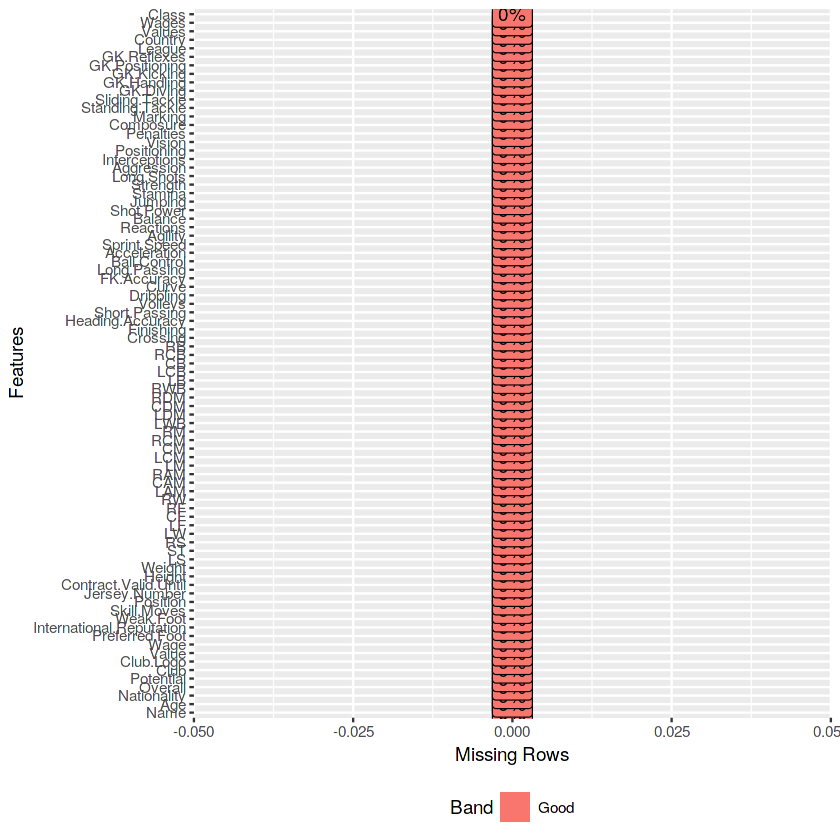

In [18]:
plot_missing(df)

<a id="section5"></a>
# 5. DATA ANALYSIS & VISUALIZATION 

<a id="subsection9"></a>
## 5.1. Finding Distribution and the Average of The Players in each League

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



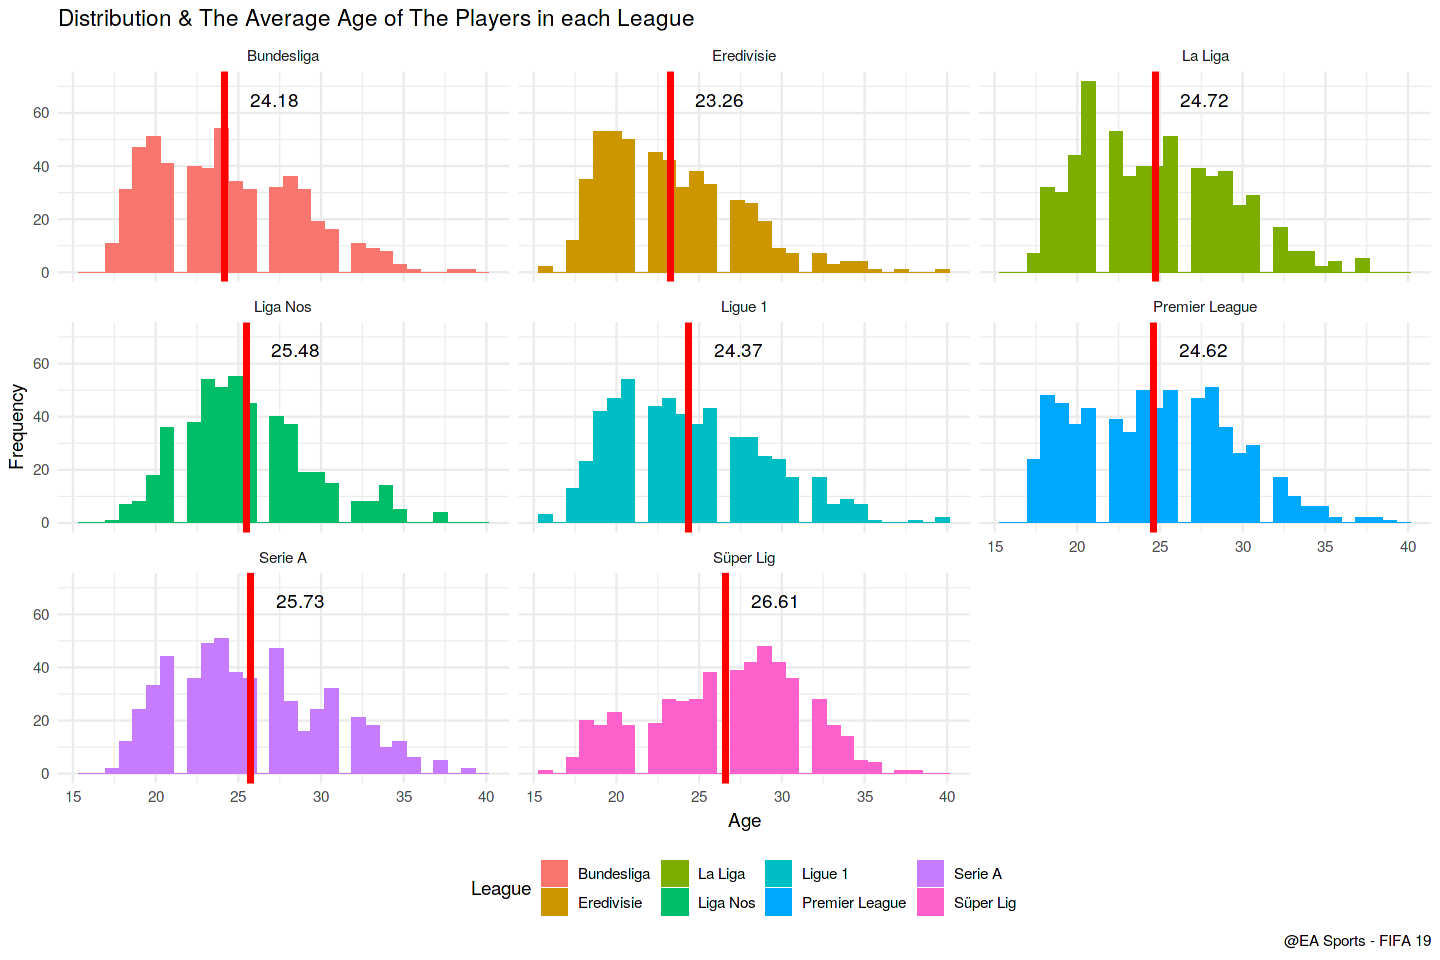

In [19]:
summ <- df %>% 
  group_by(League) %>% 
  summarise(age = mean(Age))

options(repr.plot.width = 12, repr.plot.height = 8)

ggplot()+
  geom_histogram(df, mapping = aes(Age, fill = League))+
  geom_vline(summ, mapping = aes(xintercept = age), color = "red", size = 1.5)+
  geom_text(summ, mapping = aes(x = age+3, y = 65, label = round(age,digits = 2)))+
  facet_wrap(League~.)+
  theme_minimal()+
  theme(legend.position = "bottom")+
  labs(y = "Frequency", title = "Distribution & The Average Age of The Players in each League", caption = "@EA Sports - FIFA 19")
  

<a id="subsection10"></a>
## 5.2. Total Market Value in each League 

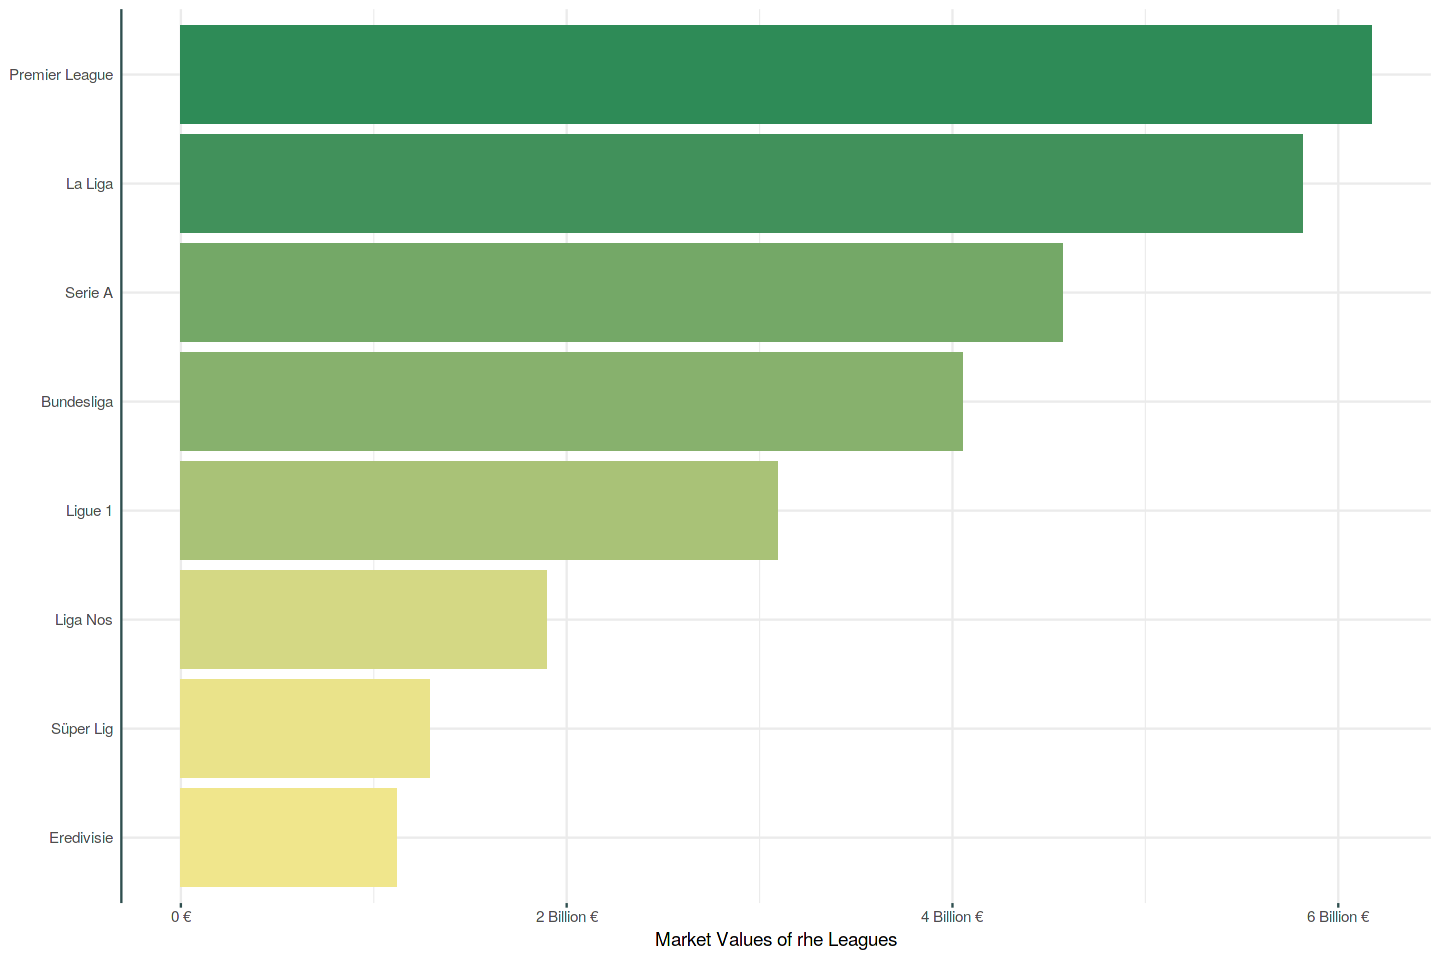

In [20]:
options(repr.plot.width = 12, repr.plot.height = 8)

df %>% 
  group_by(League) %>% 
  summarise(Total.Value = sum(as.integer(Values), na.rm = TRUE)) %>% 
  ggplot(aes(reorder(League, Total.Value), Total.Value, fill = Total.Value))+
  geom_col(show.legend = FALSE)+
  coord_flip()+
  theme_minimal()+
  labs(x = NULL, y = "Market Values of rhe Leagues")+
  scale_fill_gradient(low = "khaki", high = "seagreen")+
  theme(axis.line.y = element_line(colour = "darkslategray"),
        axis.ticks.x = element_line(colour = "darkslategray"))+
  scale_y_continuous(labels = c("0 €", "2 Billion €", "4 Billion €", "6 Billion €")) 

<a id="subsection11"></a>
## 5.3. Interactive World Map & Number of Player

ggplot2 package helps to plot world map. But ggplot does not provide interactive visuals. There is a function in the plotly package to plot interactive visuals for ggplot. This function is ggplotly function. 

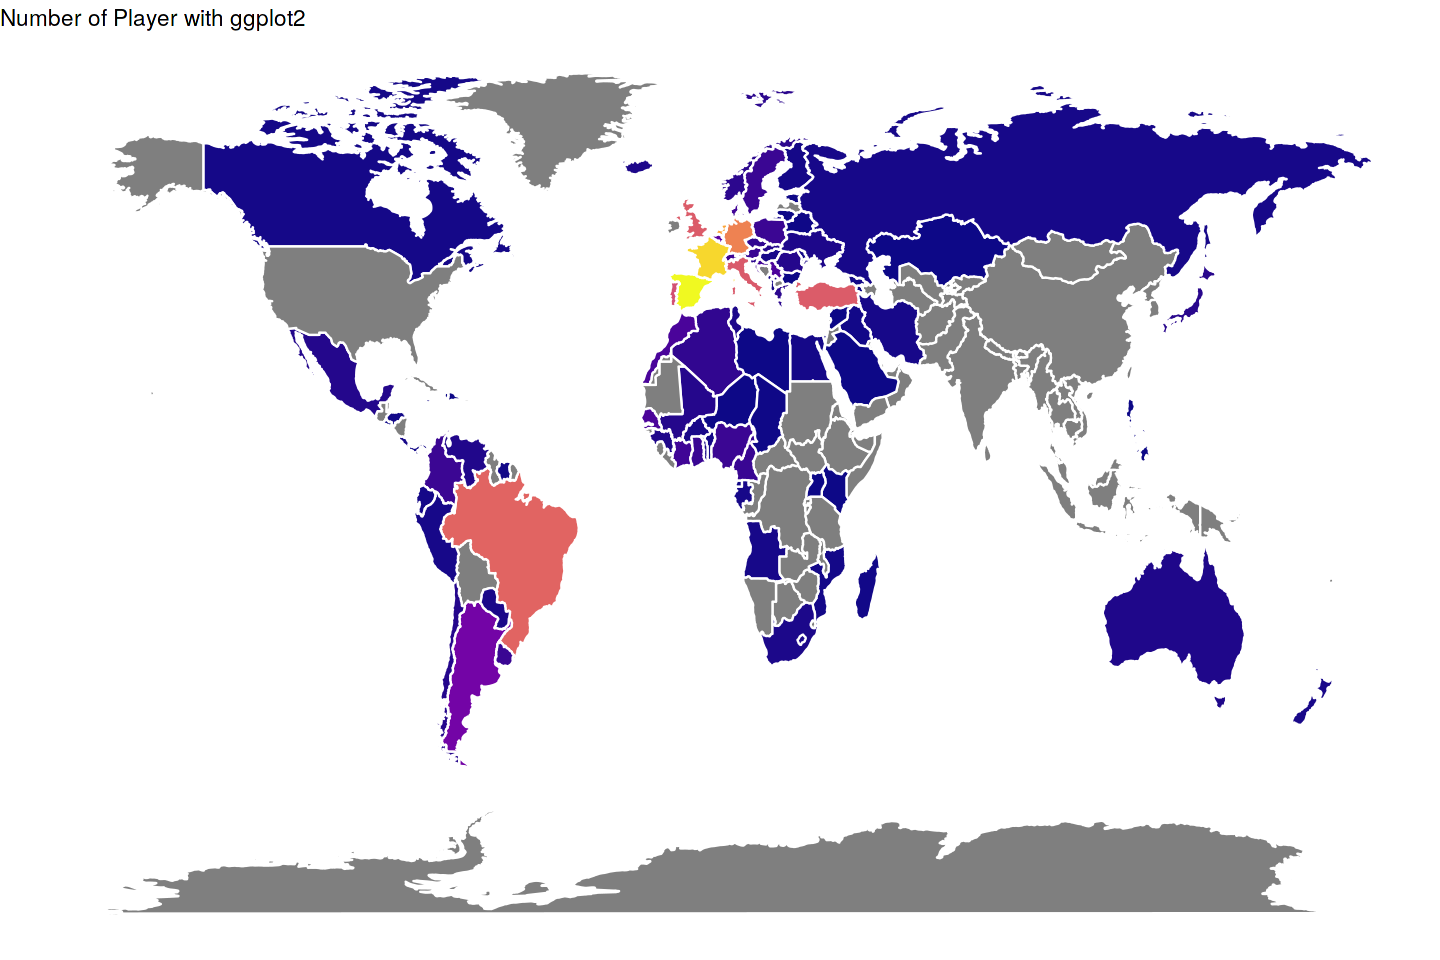

In [21]:
options(repr.plot.width = 12, repr.plot.height = 8)

world_map <- map_data("world")

numofplayers <- world_map %>% 
  mutate(region = as.character(region)) %>% 
  left_join((df %>% mutate(Nationality = as.character(Nationality),
                           Nationality = if_else(Nationality %in% "England", 
                                                 "UK", Nationality)) %>%
               #filter(League == "Bundesliga") %>%
               count(Nationality, name = "Number of Player") %>%
               rename(region = Nationality) %>%
               mutate(region = as.character(region))), by = "region")


ggplot(numofplayers, aes(long, lat, group = group))+
    geom_polygon(aes(fill = `Number of Player` ), color = "white", show.legend = FALSE)+
    scale_fill_viridis_c(option = "C")+
    theme_void()+
    labs(fill = "Number of Player",
         title = "Number of Player with ggplot2")

<a id="subsection12"></a>
## 5.4. Comparison of the Two Players 

In [22]:
# Selection of the players
players <- df %>% 
  filter(Name %in% c("Cristiano Ronaldo", "L. Messi")) %>% 
# Unite Name & Club variables
  mutate(Name = paste0(Name, ", ", Club)) %>%
# Selection abilities of the players
  select(Name,Crossing:Sliding.Tackle) %>% 
# Correction of the punctuation
  rename_all(funs(gsub("[[:punct:]]", " ", .))) %>% 
# Tranform from Variable to Observation
  gather(Skill, Exp, Crossing:`Sliding Tackle`, -Name)
head(players  )

Warning message:
“funs() is soft deprecated as of dplyr 0.8.0
Please use a list of either functions or lambdas: 

  # Simple named list: 
  list(mean = mean, median = median)

  # Auto named with `tibble::lst()`: 
  tibble::lst(mean, median)

  # Using lambdas
  list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))
This warning is displayed once per session.”


Name                        Skill            Exp
1 L. Messi, FC Barcelona      Crossing         84 
2 Cristiano Ronaldo, Juventus Crossing         84 
3 L. Messi, FC Barcelona      Finishing        95 
4 Cristiano Ronaldo, Juventus Finishing        94 
5 L. Messi, FC Barcelona      Heading Accuracy 70 
6 Cristiano Ronaldo, Juventus Heading Accuracy 89

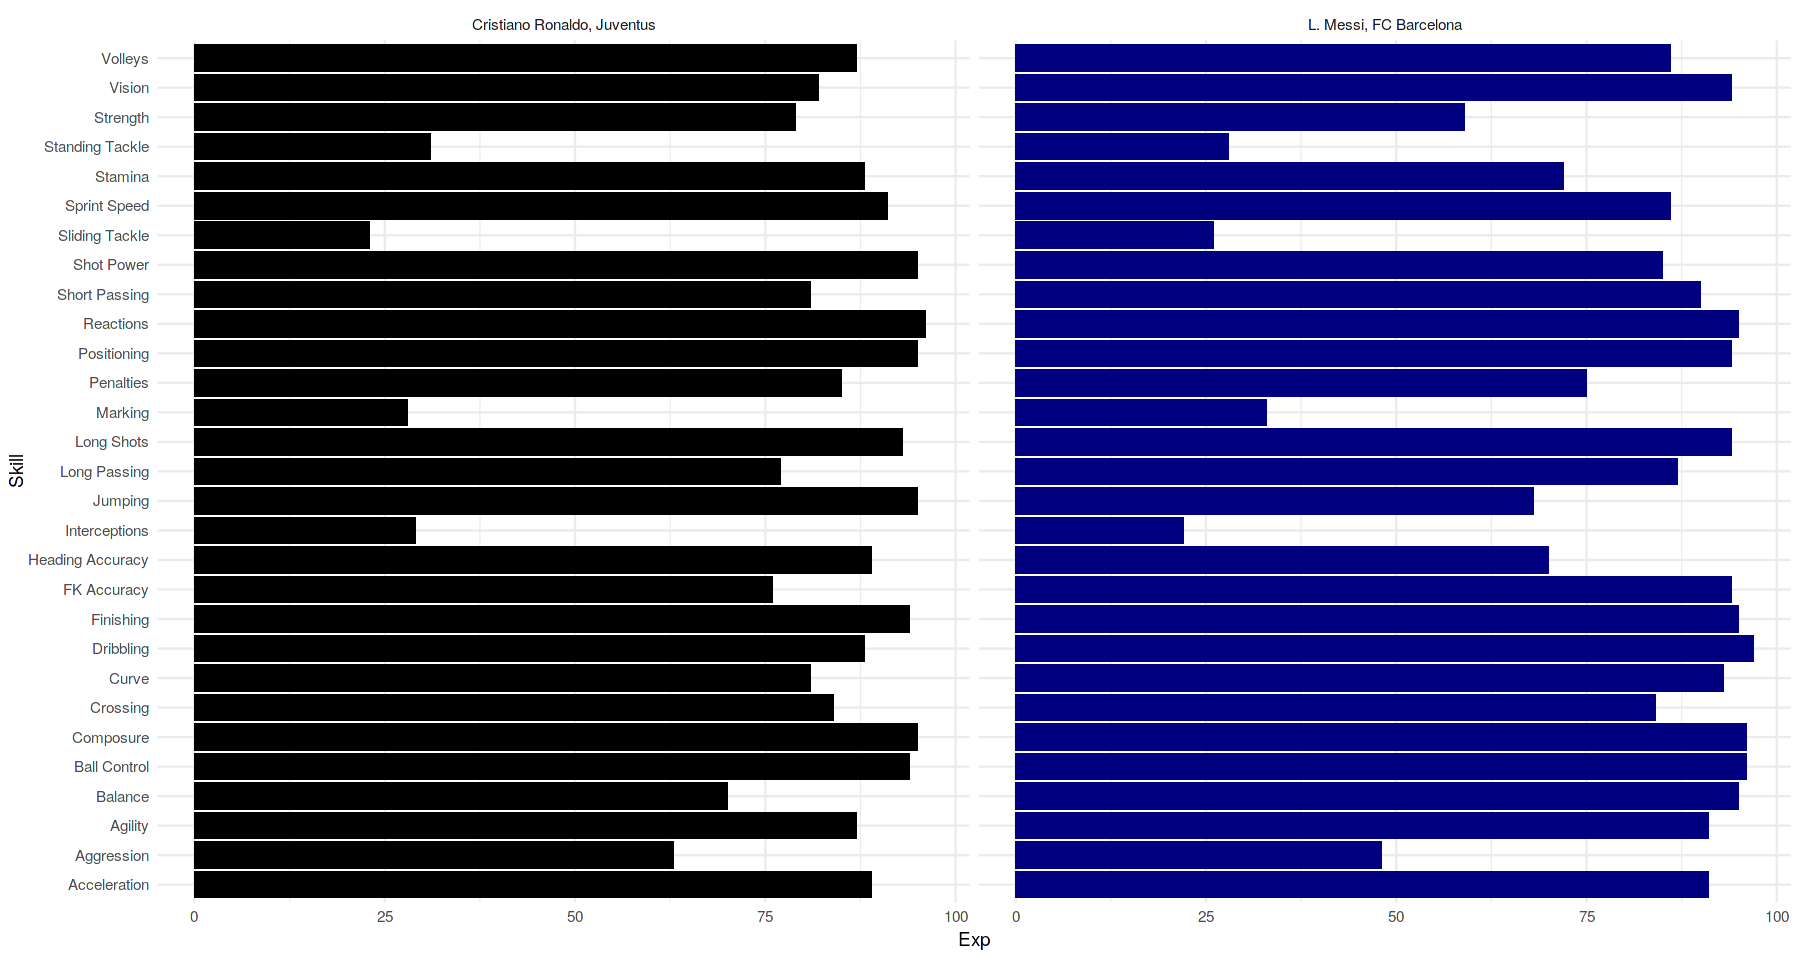

In [23]:
options(repr.plot.width = 15, repr.plot.height = 8)

# Becerilere göre futbolcuların ayrı ayrı görselleştirilmesi
ggplot(players, aes(Skill, Exp, fill = Name))+
  geom_col(show.legend = FALSE)+
  coord_flip()+
  facet_wrap(Name~.)+
  scale_fill_manual(values = c("black", "navy"))+
  theme_minimal()

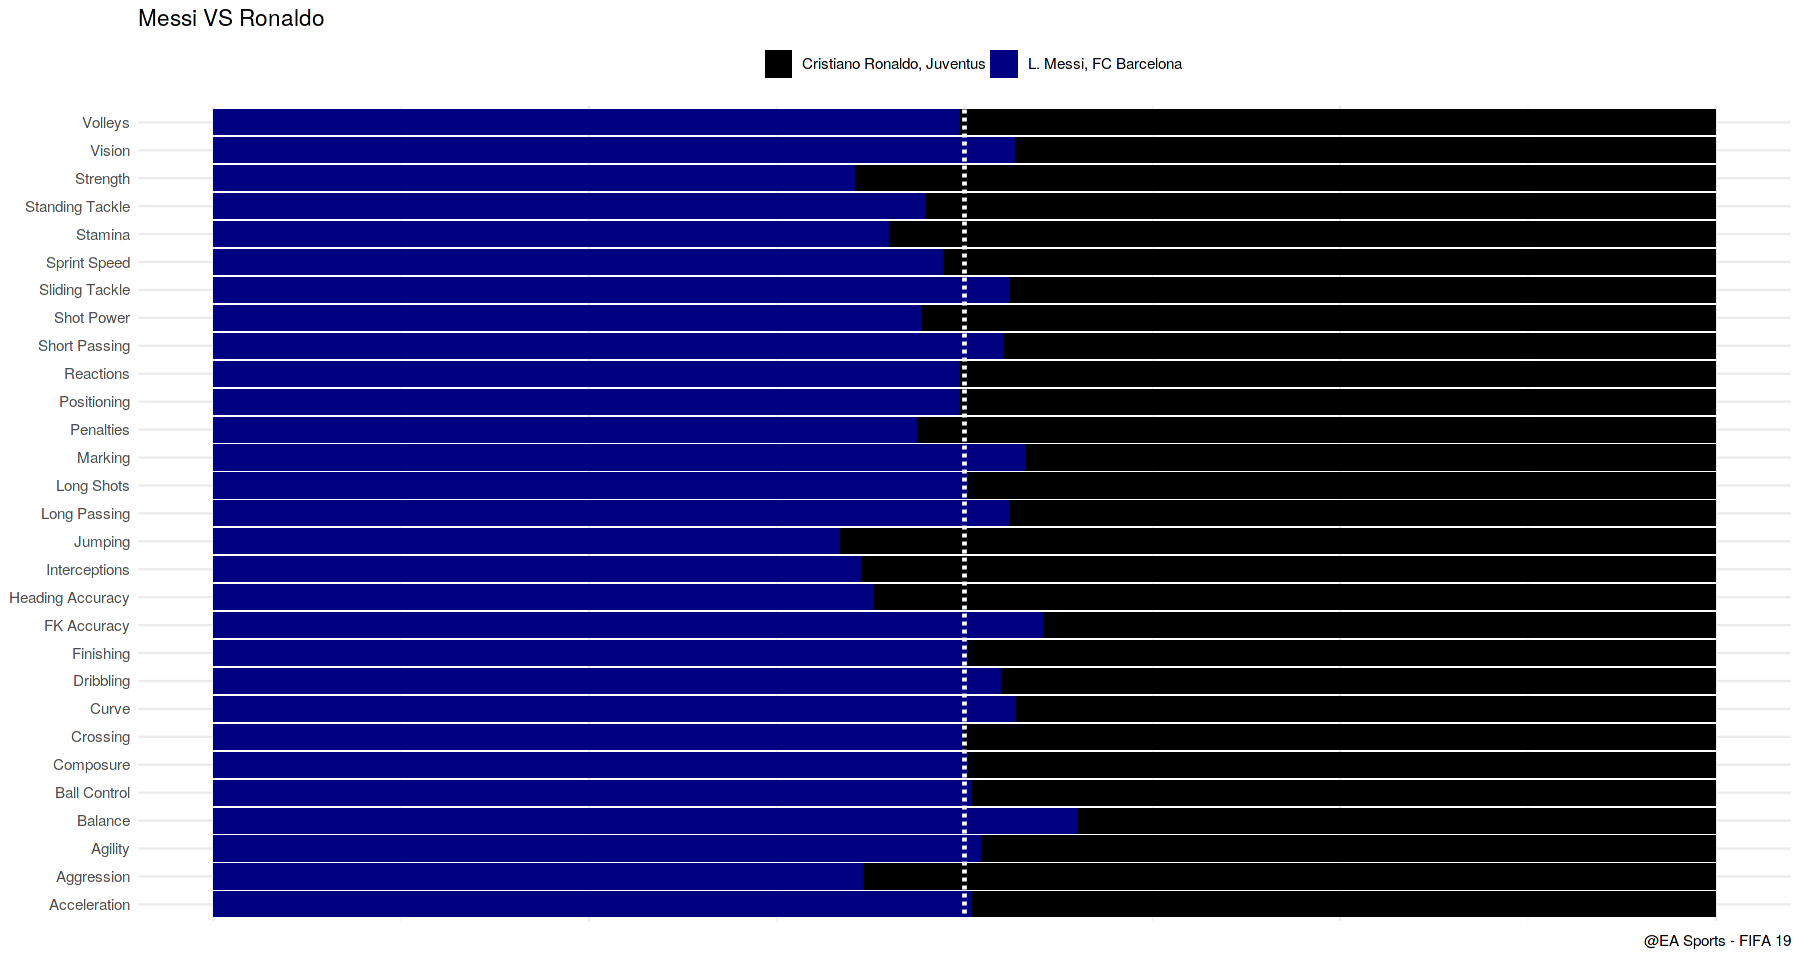

In [24]:
options(repr.plot.width = 15, repr.plot.height = 8)

# Becerilere göre futbolcuların birlikte görselleştirilmesi
ggplot(players, aes(Skill, Exp, fill = Name))+
  geom_col(position = "fill")+
  coord_flip()+
  scale_fill_manual(values = c("black", "navy"))+
  theme_minimal()+
  geom_hline(yintercept = 0.5, color = "white", size = 1, linetype = 2)+
  theme(legend.position = "top", axis.text.x=element_blank())+
  labs(title = "Messi VS Ronaldo", 
       caption = "@EA Sports - FIFA 19",
       fill = NULL,x = NULL, y = NULL)

<a id="subsection13"></a>
## 5.5. Visualization of the Position

Warning message:
“NAs introduced by coercion”
Warning message:
“Column `Pos` joining factors with different levels, coercing to character vector”


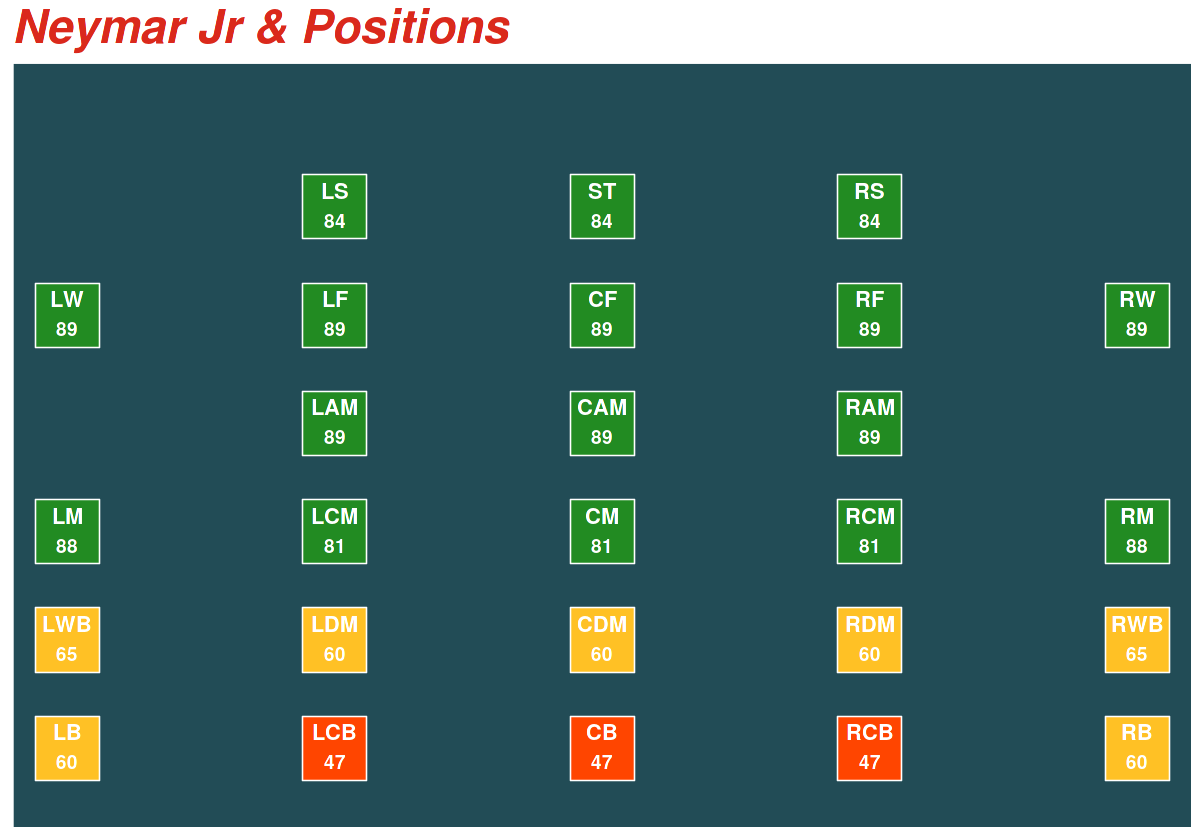

In [25]:
options(repr.plot.width = 10, repr.plot.height = 7)

# Select a player
player <- df %>% filter(Name == "Neymar Jr")%>%  select(Position, LS:RB)
# Transform from column to observation
player <- as.data.frame(t(player)) %>% 
  rownames_to_column("Pos") %>% 
  mutate(V1 = as.numeric(str_sub(V1, end = 2)),
         Pos = as.factor(Pos))

# Create pitch & positions
pos <- data.frame(
  Pos = as.character(c("LB","LCB","CB", "RCB","RB",
                      "LWB", "LDM", "CDM", "RDM", "RWB",
                      "LM", "LCM", "CM", "RCM", "RM",
                      "LAM", "CAM", "RAM",
                      "LW","LF","CF","RF","RW",
                      "LS","ST","RS")), 
  x = c(1:5, 1:5,1:5, 2:4, 1:5,2:4),
  y = c(rep(1,5), rep(1.5,5), rep(2,5), rep(2.5,3), rep(3,5), rep(3.5,3)))

# Join player data & pitch
player <- left_join(player, pos, by = 'Pos')

# Remove an unnecessary observation
player <- na.omit(player)

# Visual
ggplot(player, aes(x, y, fill = if_else(V1 < 50, "orangered", 
                                        if_else(V1 <60, "orange",
                                                if_else(V1 < 70, "goldenrod1", 
                                                        if_else(V1 <80, "palegreen4",
                                                                if_else(V1 < 90, "forestgreen",
                                                                        if_else(V1 == 0,
                                                                                "orangered","darkgreen"))))))
                   ))+
  geom_point(shape = 22, size = 20, color = "white", show.legend = FALSE,position = "identity")+
  theme(panel.background = element_rect(fill = "#224C56"),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        axis.text = element_blank(),
        axis.ticks = element_blank(),
        axis.title = element_blank(),
        title = element_text(color = "#DA291C",face="bold.italic",size = 23) 
        )+
  geom_text(aes(label = Pos), vjust= -0.5, color = "white", size = 4.5, fontface = "bold")+
  geom_text(aes(label = V1), vjust = 1.5, fontface = "bold", color = "white")+
  scale_fill_identity()+
  ylim(0.8, 4)+
  labs(title = "Neymar Jr & Positions")

<a id="subsection14"></a>
## 5.6. BMI - Body Mass Index 

- Below the Ideal Weight:	   < 18,49
- Ideal Weight:	               18.5 - 24,99
- Over the Ideal Weight:	   25 - 29,99
- Much Over The Ideal Weight:  > 30


In [26]:
# Calculate BMI
bmi <- df %>% 
  filter(Club == "Liverpool") %>%
  mutate(BMI = round(Weight/(Height/100)^2, digits = 4))%>%
  arrange(-BMI)%>%
  select(Name, Age, Position, Class, Height, Weight, BMI)

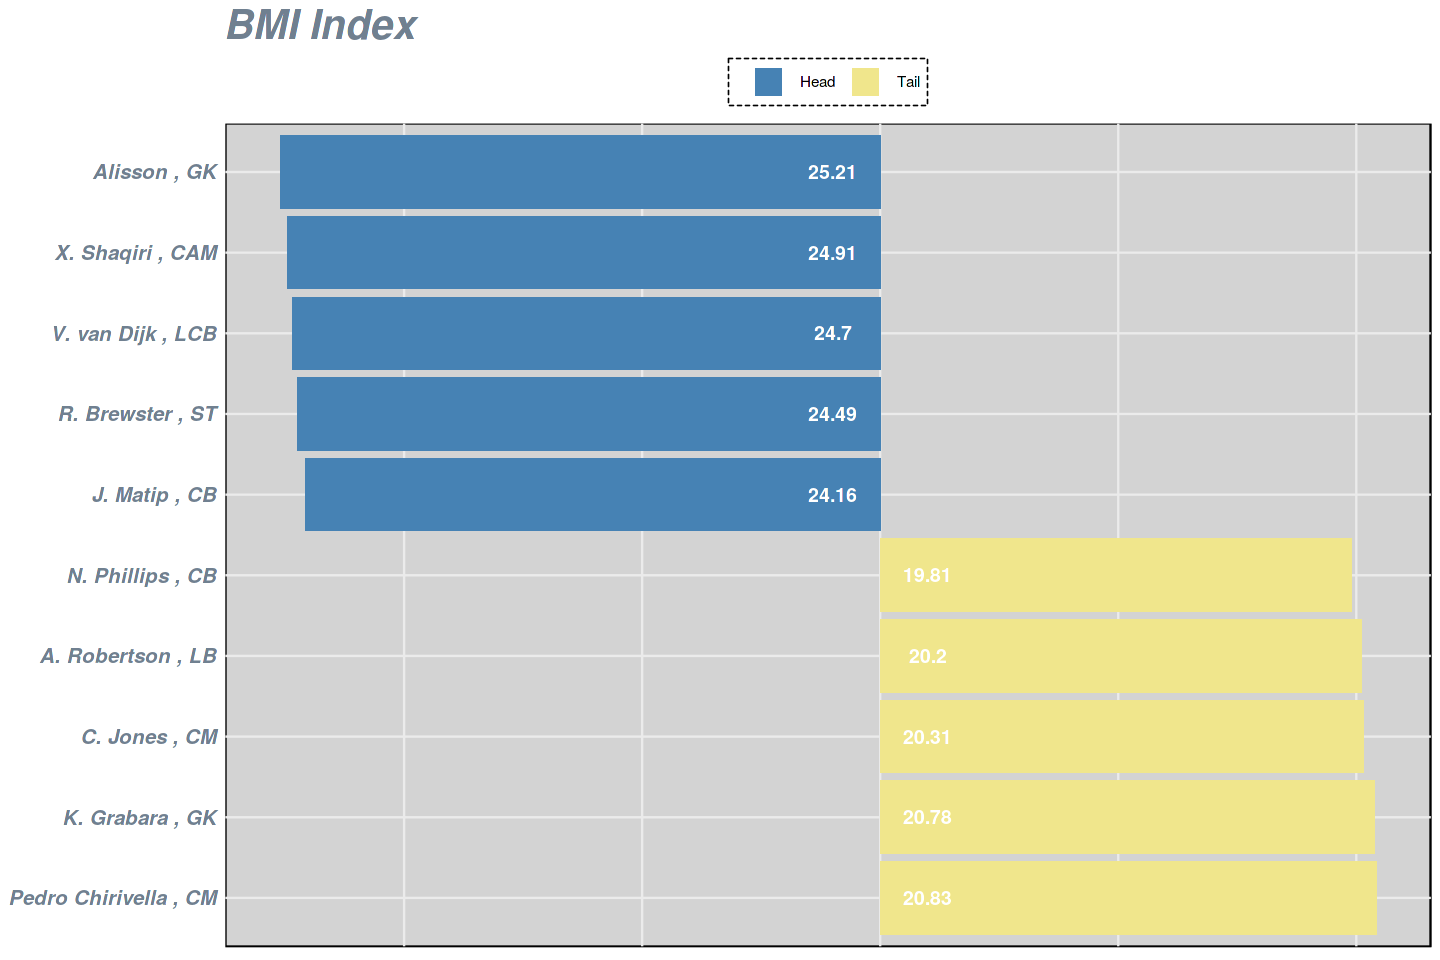

In [27]:
options(repr.plot.width = 12, repr.plot.height = 8)

# Head & Tail Observations
bmi2  <- rbind(
  bmi %>% head(5) %>% mutate(BMI = BMI * -1),
  bmi %>% tail(5)
  ) %>% mutate(Type = if_else(BMI < 0, "Head", "Tail"))

# BMI Visual
bmi2 %>% 
  ggplot(aes(fct_reorder(paste(Name,",", Position), desc(BMI)), BMI))+
  geom_col(aes(fill = Type))+
  geom_text(aes(y = c(rep(-2,5), rep(2,5)),label = round(abs(BMI),digits = 2)), 
            color = "white", fontface = "bold", size = 4)+
  coord_flip()+
  theme_minimal()+
  theme(axis.text.x = element_blank(),
        legend.position = "top",
        panel.background = element_rect(fill = "lightgray"),
        panel.grid.minor = element_blank(),
        axis.text = element_text(color = "slategray", face = "bold.italic",size = 12),
        title = element_text(color = "slategray", face = "bold.italic",size = 20),
        legend.box.background = element_rect(linetype = 2))+
  labs(x = NULL, y = NULL, fill = NULL, title = "BMI Index")+
  scale_fill_manual(values = c("steelblue", "khaki"))

<a id="subsection15"></a>
## 5.7. Correlation 

Is there a relationship between Finishing and Shot Power?

First of all, we should choose correlation coefficient wisely. Therefore, we have to control normallity. Shapiro test is an univariate normallity test. If p-value is less than 0.05, we reject H0 hypothesis and distribution of the variable is not normal.

In [28]:
kor <- df %>% 
  filter(League == "La Liga", Class == "Forward") %>% 
  select(Name, Preferred.Foot, Finishing, Shot.Power)

shapiro.test(kor$Finishing); shapiro.test(kor$Shot.Power)


	Shapiro-Wilk normality test

data:  kor$Finishing
W = 0.9751, p-value = 0.03053



	Shapiro-Wilk normality test

data:  kor$Shot.Power
W = 0.9425, p-value = 0.00009062


Finishing and Shot Power are not normal. Spearman correlation coefficient is much suitable to using.

In [29]:
cor.test(kor$Shot.Power, kor$Finishing, method = "pearson")
cor.test(kor$Shot.Power, kor$Finishing, method = "kendall")
hypo <- cor.test(kor$Shot.Power, kor$Finishing, method = "spearman")
hypo


	Pearson's product-moment correlation

data:  kor$Shot.Power and kor$Finishing
t = 12.023, df = 113, p-value < 0.00000000000000022
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6560646 0.8198210
sample estimates:
     cor 
0.749175 



	Kendall's rank correlation tau

data:  kor$Shot.Power and kor$Finishing
z = 8.7156, p-value < 0.00000000000000022
alternative hypothesis: true tau is not equal to 0
sample estimates:
      tau 
0.5674854 


Warning message in cor.test.default(kor$Shot.Power, kor$Finishing, method = "spearman"):
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  kor$Shot.Power and kor$Finishing
S = 64431, p-value < 0.00000000000000022
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.7457925 


`geom_smooth()` using formula 'y ~ x'



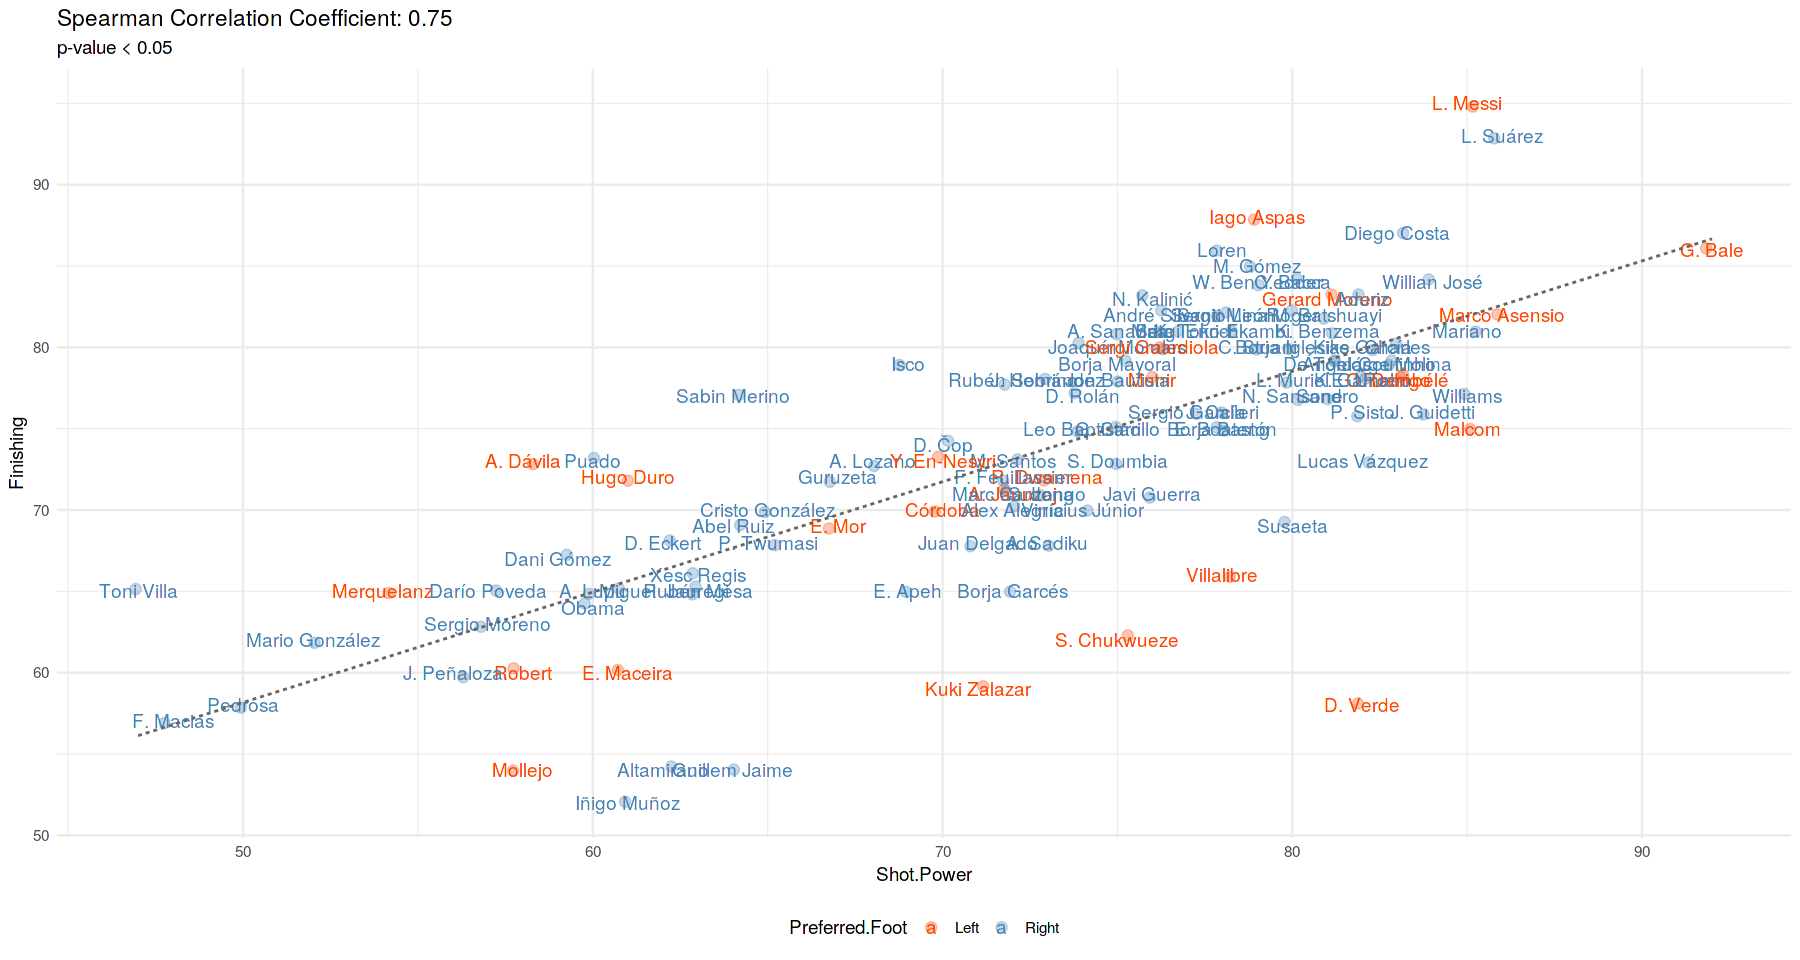

In [30]:
options(repr.plot.width = 15, repr.plot.height = 8)

ggplot(kor, aes(Shot.Power, Finishing, label = Name, color = Preferred.Foot))+
  geom_text()+
  theme_minimal()+
  theme(legend.position = "bottom")+
  geom_jitter(alpha = 0.3, size = 2.5, width = 0.3, height = 0.3)+
  geom_smooth(method = "lm", color = "gray40", lty = 2, se = FALSE, size = 0.6)+
  scale_color_manual(values = c("orangered","steelblue"))+
  labs(title = paste("Spearman Correlation Coefficient:", round(hypo$estimate, digits = 2)),
       subtitle = "p-value < 0.05")

<a id="subsection16"></a>
## 5.8. Unpaired Two Sample Wilcoxon Test 

Is there any significant difference between left foot and right foot abilities?


In [31]:
xt1 <- kor %>% filter(Preferred.Foot == "Left") %>% select(Shot.Power) %>% pull()
xt2 <- kor %>% filter(Preferred.Foot == "Right") %>% select(Shot.Power) %>% pull()
yt1 <- kor %>% filter(Preferred.Foot == "Left") %>% select(Finishing) %>% pull()
yt2 <- kor %>% filter(Preferred.Foot == "Right") %>% select(Finishing) %>% pull()
xht <- wilcox.test(xt1, xt2, alternative = "two.sided")
yht <- wilcox.test(yt1, yt2, alternative = "two.sided")

xht; yht


	Wilcoxon rank sum test with continuity correction

data:  xt1 and xt2
W = 1160, p-value = 0.8149
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum test with continuity correction

data:  yt1 and yt2
W = 974.5, p-value = 0.3086
alternative hypothesis: true location shift is not equal to 0


There is no significantly difference between right foot and left foot values.

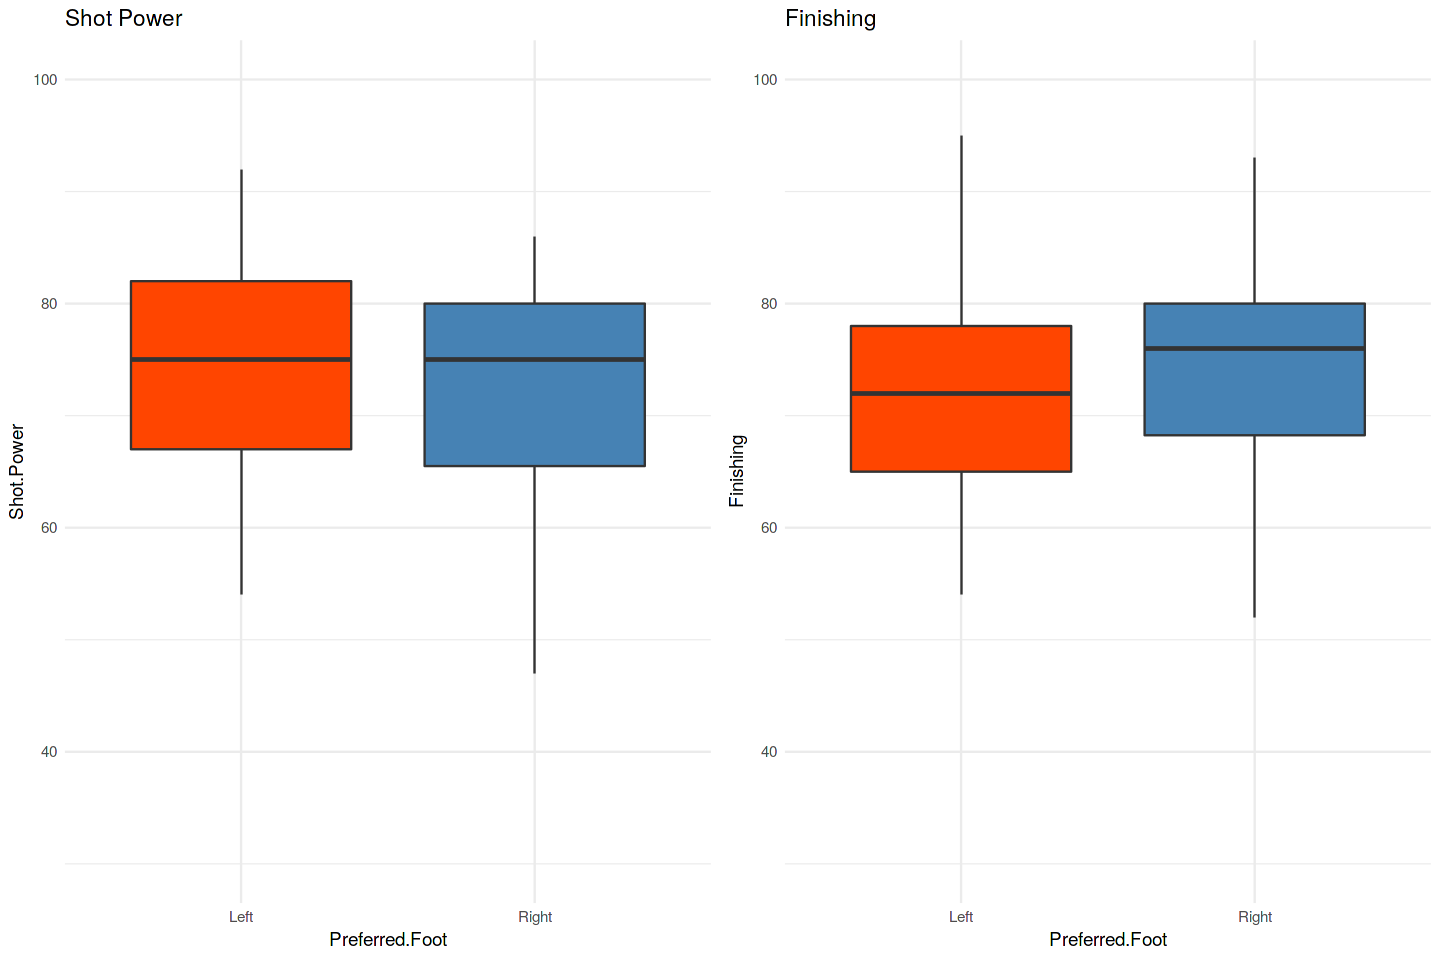

In [32]:
options(repr.plot.width = 12, repr.plot.height = 8)

grid.arrange(ncol = 2,
  ggplot(kor, aes(x = Preferred.Foot, y = Shot.Power, fill = Preferred.Foot))+
    geom_boxplot(show.legend = FALSE)+
    theme_minimal()+
    scale_fill_manual(values = c("orangered", "steelblue"))+
    ylim(30,100)+
    labs(title = "Shot Power"),
  
  ggplot(kor, aes(x = Preferred.Foot, y = Finishing, fill = Preferred.Foot))+
    geom_boxplot(show.legend = FALSE)+
    theme_minimal()+
    scale_fill_manual(values = c("orangered", "steelblue"))+
    ylim(30,100)+
    labs(title = "Finishing")
)

<a id="subsection17"></a>
## 5.9. Potential & Overall 

### 5.9.1. The Best Players from Paris Saint-Germain <a name="5.9.1."></a>

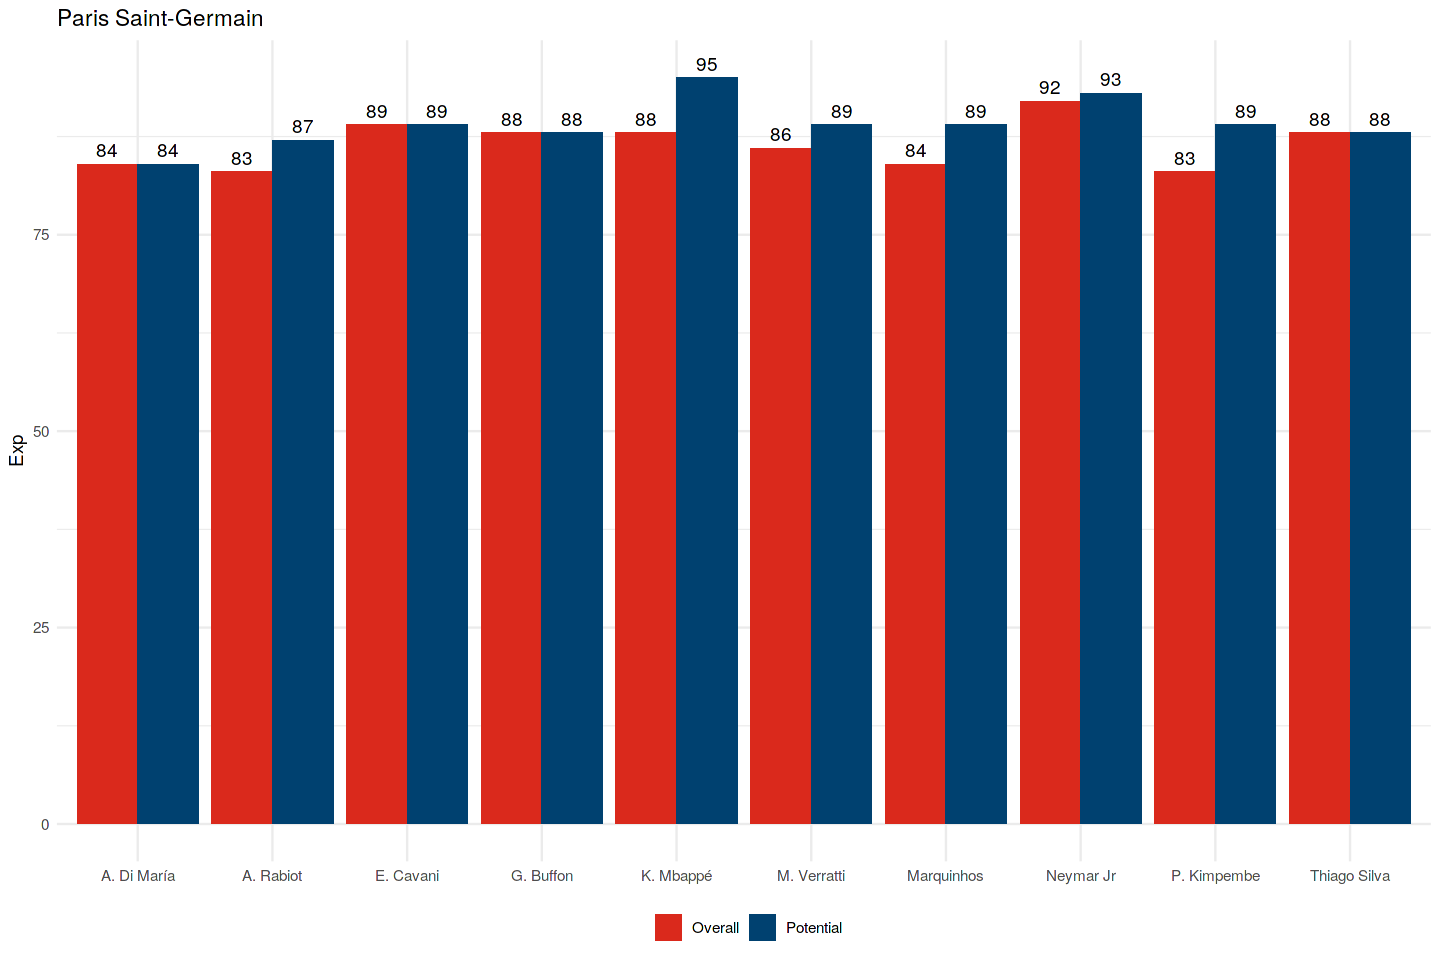

In [33]:
options(repr.plot.width = 12, repr.plot.height = 8)

df %>% 
  filter(Club == "Paris Saint-Germain") %>% 
  select(Name, Overall, Potential) %>% 
  arrange(-Overall) %>% 
  head(10) %>% 
  gather(variable, Exp, -Name) %>% 
  ggplot(aes(Name, Exp, fill = variable))+
  geom_col(position = "dodge")+
  geom_text(aes(label = Exp),position = position_dodge(width = 0.9), vjust = -0.5)+
  scale_fill_manual(values = c("#DA291C", "#004170"))+
  theme_minimal()+
  theme(legend.position = "bottom")+
  labs(fill = NULL, x = NULL, title = "Paris Saint-Germain")

<a id="subsection18"></a>
## 5.9.2. According to Age, Comparison Average Potential & Overall

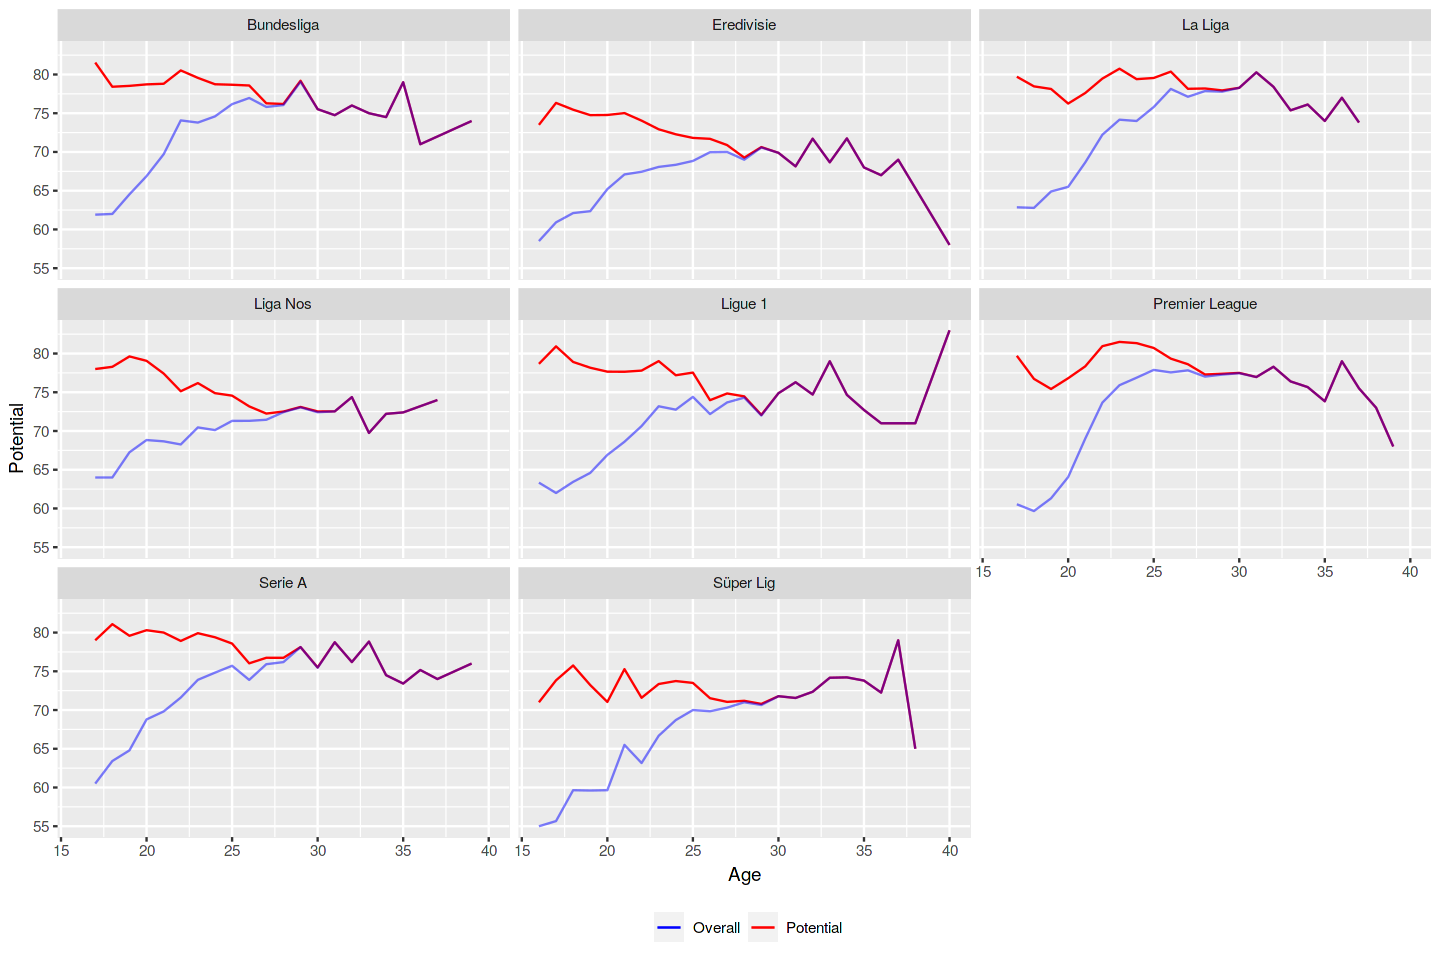

In [34]:
options(repr.plot.width = 12, repr.plot.height = 8)

df %>% 
  group_by(League, Age) %>% 
  summarise(Overall = mean(Overall),
            Potential = mean(Potential)) %>% 
  ggplot()+
  geom_line(aes(Age, Potential, color = "Potential")) +
  geom_line(aes(Age, Overall, color = "Overall"), alpha = 0.5) +
  facet_wrap(League~.)+
  scale_color_manual(values = c("blue", "red"))+
  theme(legend.position = "bottom")+
  labs(color = NULL)

<a id="subsection19"></a>
## 5.10. When will contracts expire in each league? 

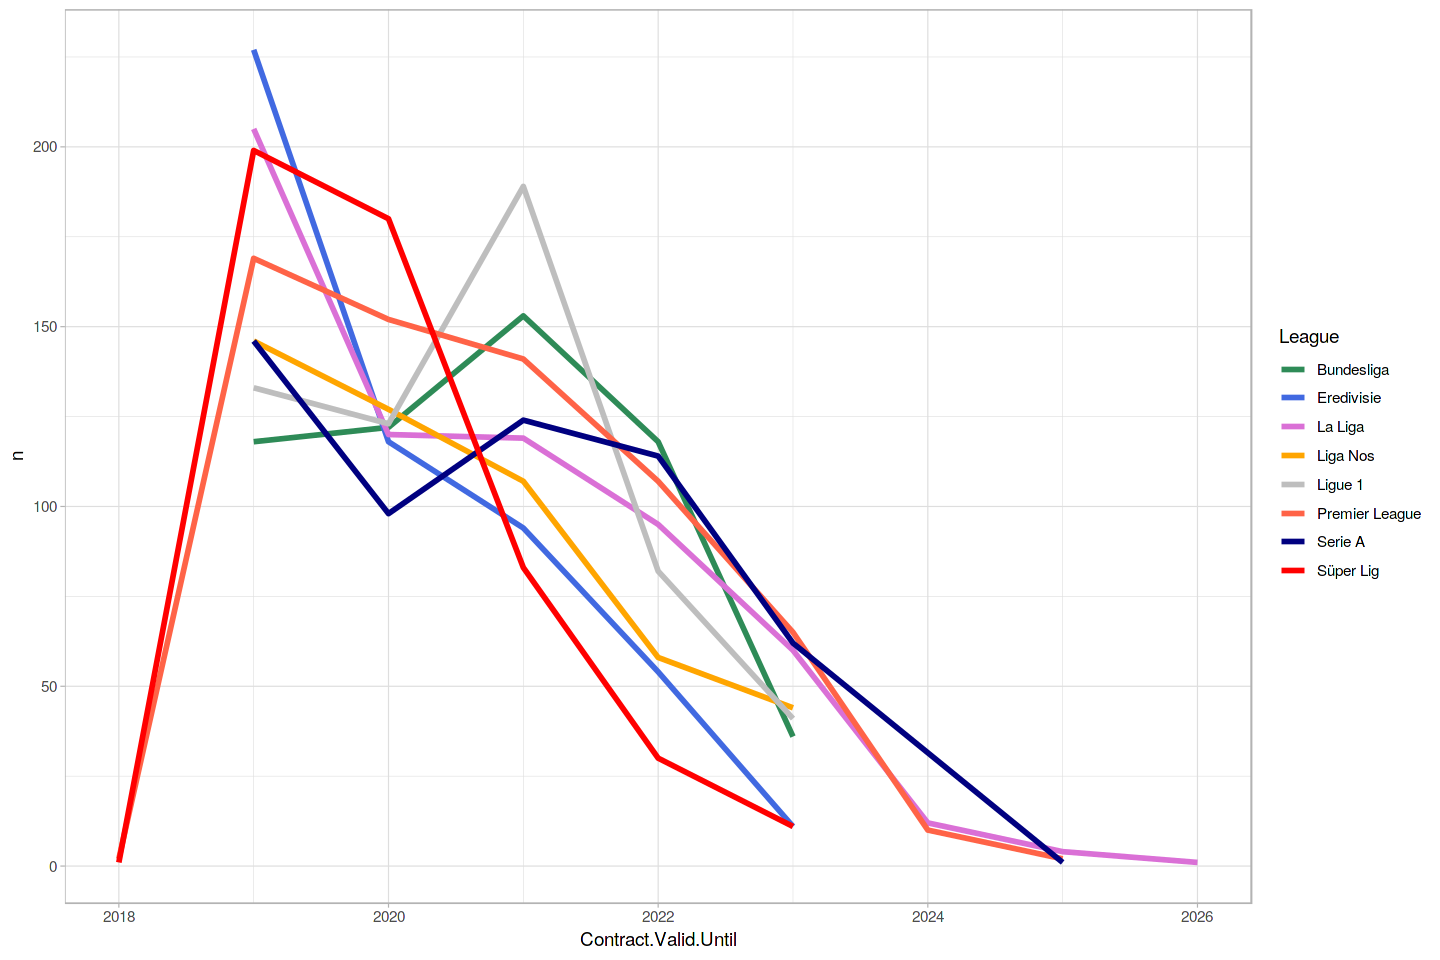

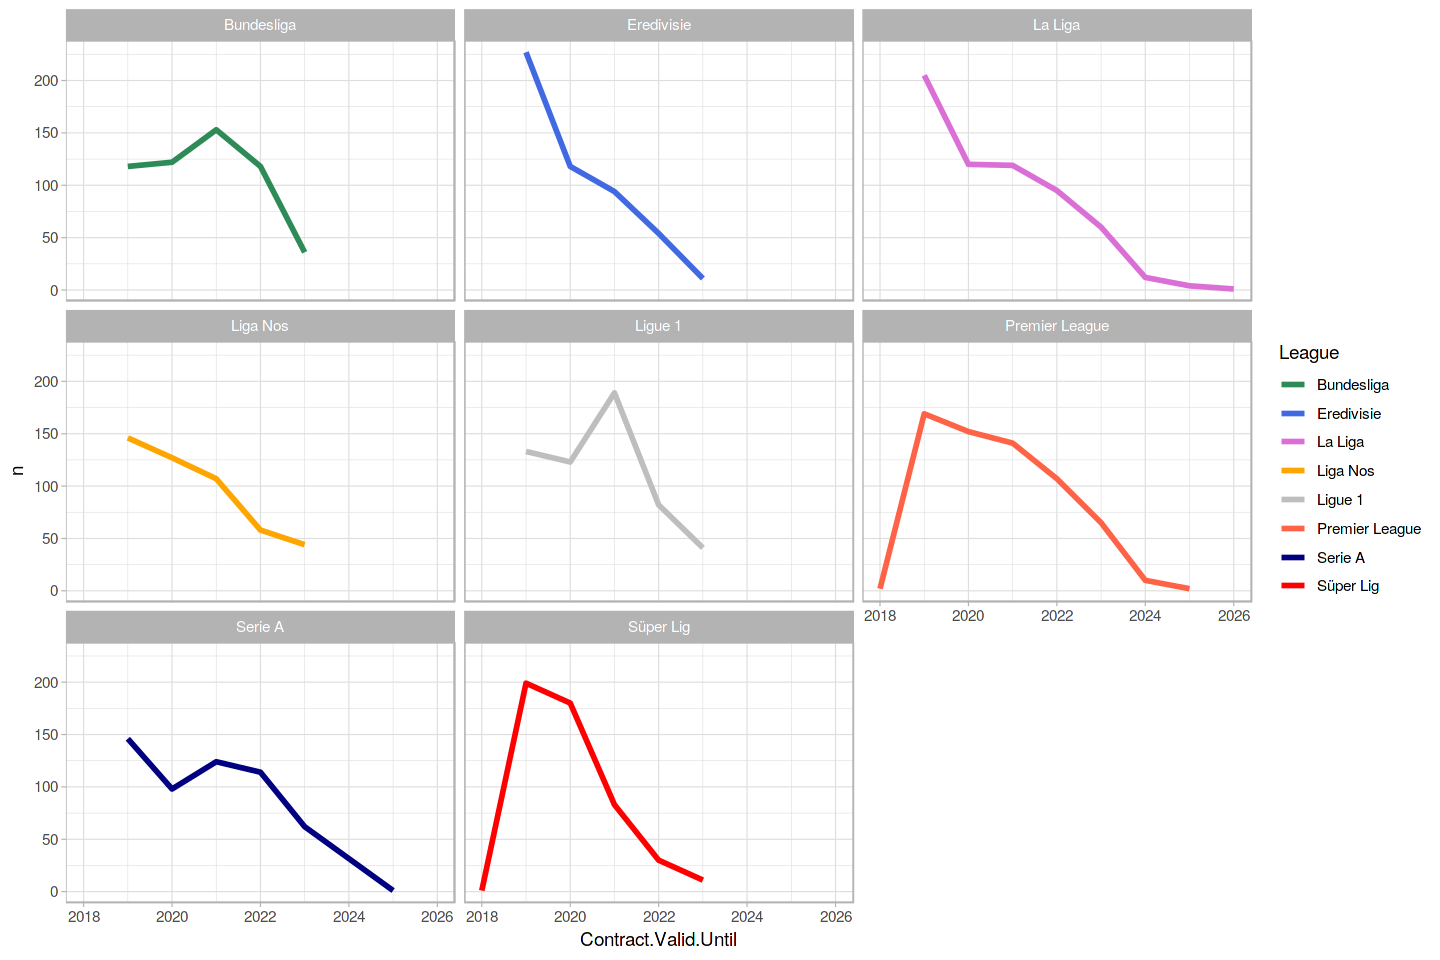

In [35]:
options(repr.plot.width = 12, repr.plot.height = 8)

df <- df %>% 
  mutate(Contract.Valid.Until = as.numeric(
    str_sub(
      Contract.Valid.Until, str_length(Contract.Valid.Until)-3, str_length(Contract.Valid.Until))
    )
  ) 

df %>% 
  group_by(Contract.Valid.Until, League) %>% 
  count() %>%
  ungroup() %>% 
  ggplot(aes(Contract.Valid.Until, n, color = League))+
  geom_line(size = 1.2)+
  theme_light()+
  scale_color_manual(values = c("seagreen", "royalblue", "orchid", "orange", "gray", "tomato", "navy", "red"))

df %>% 
  group_by(Contract.Valid.Until, League) %>% 
  count() %>%
  ungroup() %>% 
  ggplot(aes(Contract.Valid.Until, n, color = League))+
  geom_line(size = 1.2)+
  theme_light()+
  scale_color_manual(values = c("seagreen", "royalblue", "orchid", "orange", "gray", "tomato", "navy", "red"))+
  facet_wrap(League~.)

<a id="subsection20"></a>
## 5.11. The Most Powerful Clubs 

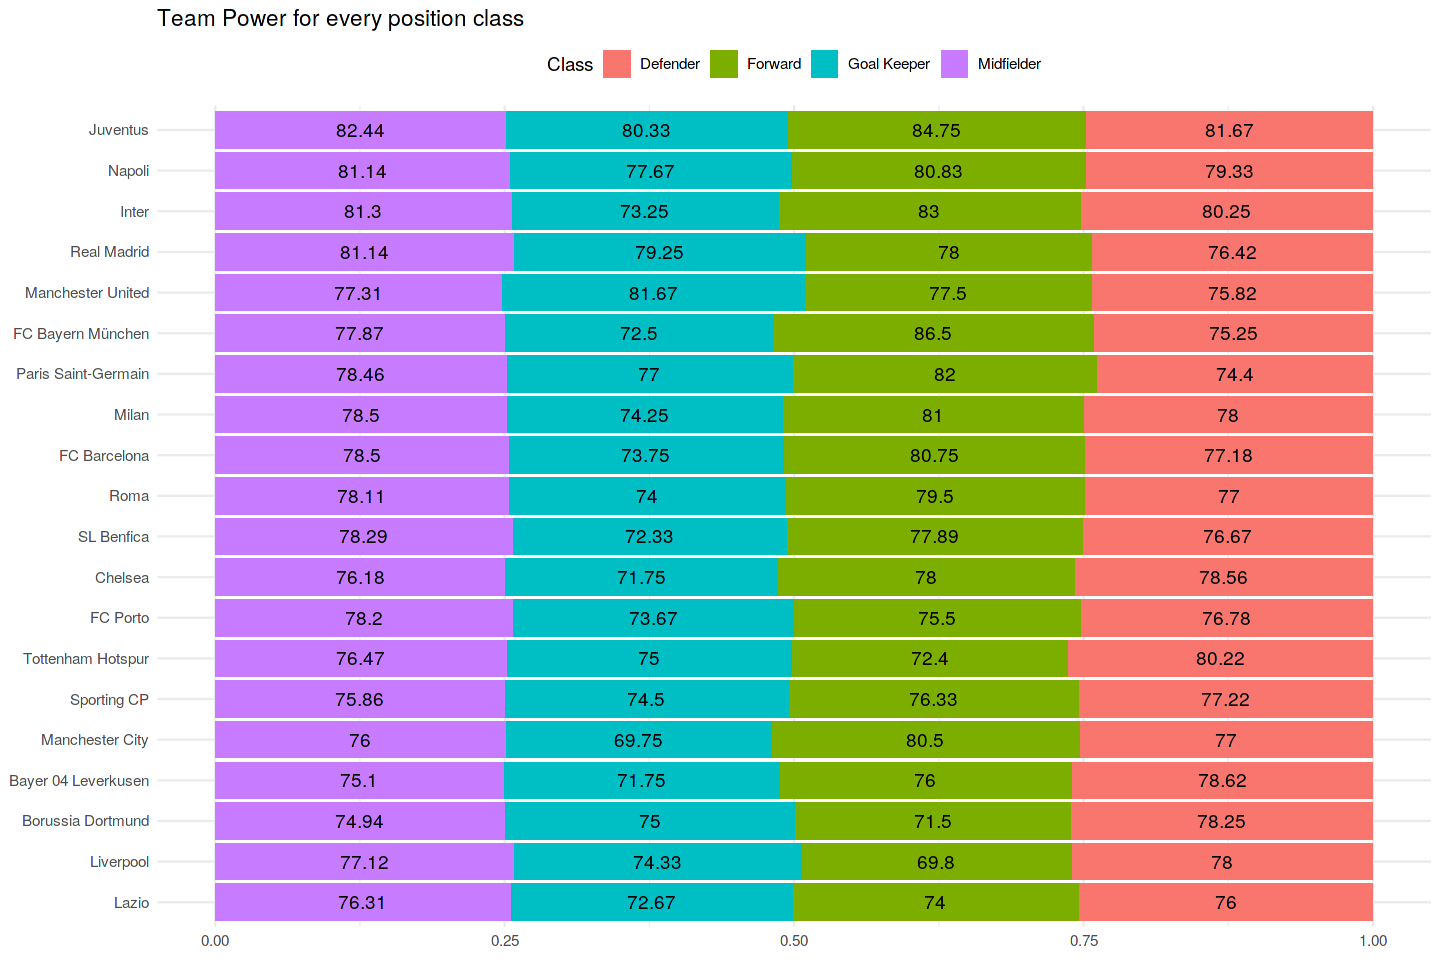

In [36]:
options(repr.plot.width = 12, repr.plot.height = 8)

powerful <- df %>% 
  group_by(Club) %>% 
  summarise(mean = mean(Overall)) %>% 
  arrange(-mean) %>% 
  head(20)


df %>% 
  group_by(Club, Class) %>% 
  summarise(mean = mean(Overall)) %>% 
  ungroup() %>% 
  filter(Club %in% powerful$Club) %>% 
  ggplot(aes(reorder(Club, mean), mean, fill = Class))+
  geom_col(position = "fill")+
  geom_text(aes(label = round(mean,digits = 2)), position = position_fill(0.5))+
  coord_flip()+
  theme_minimal()+
  theme(legend.position = "top")+
  labs(x = NULL, y = NULL, title = "Team Power for every position class")

<a id="subsection21"></a>
## 5.12. The Best Abilities of The Best Forward Players 

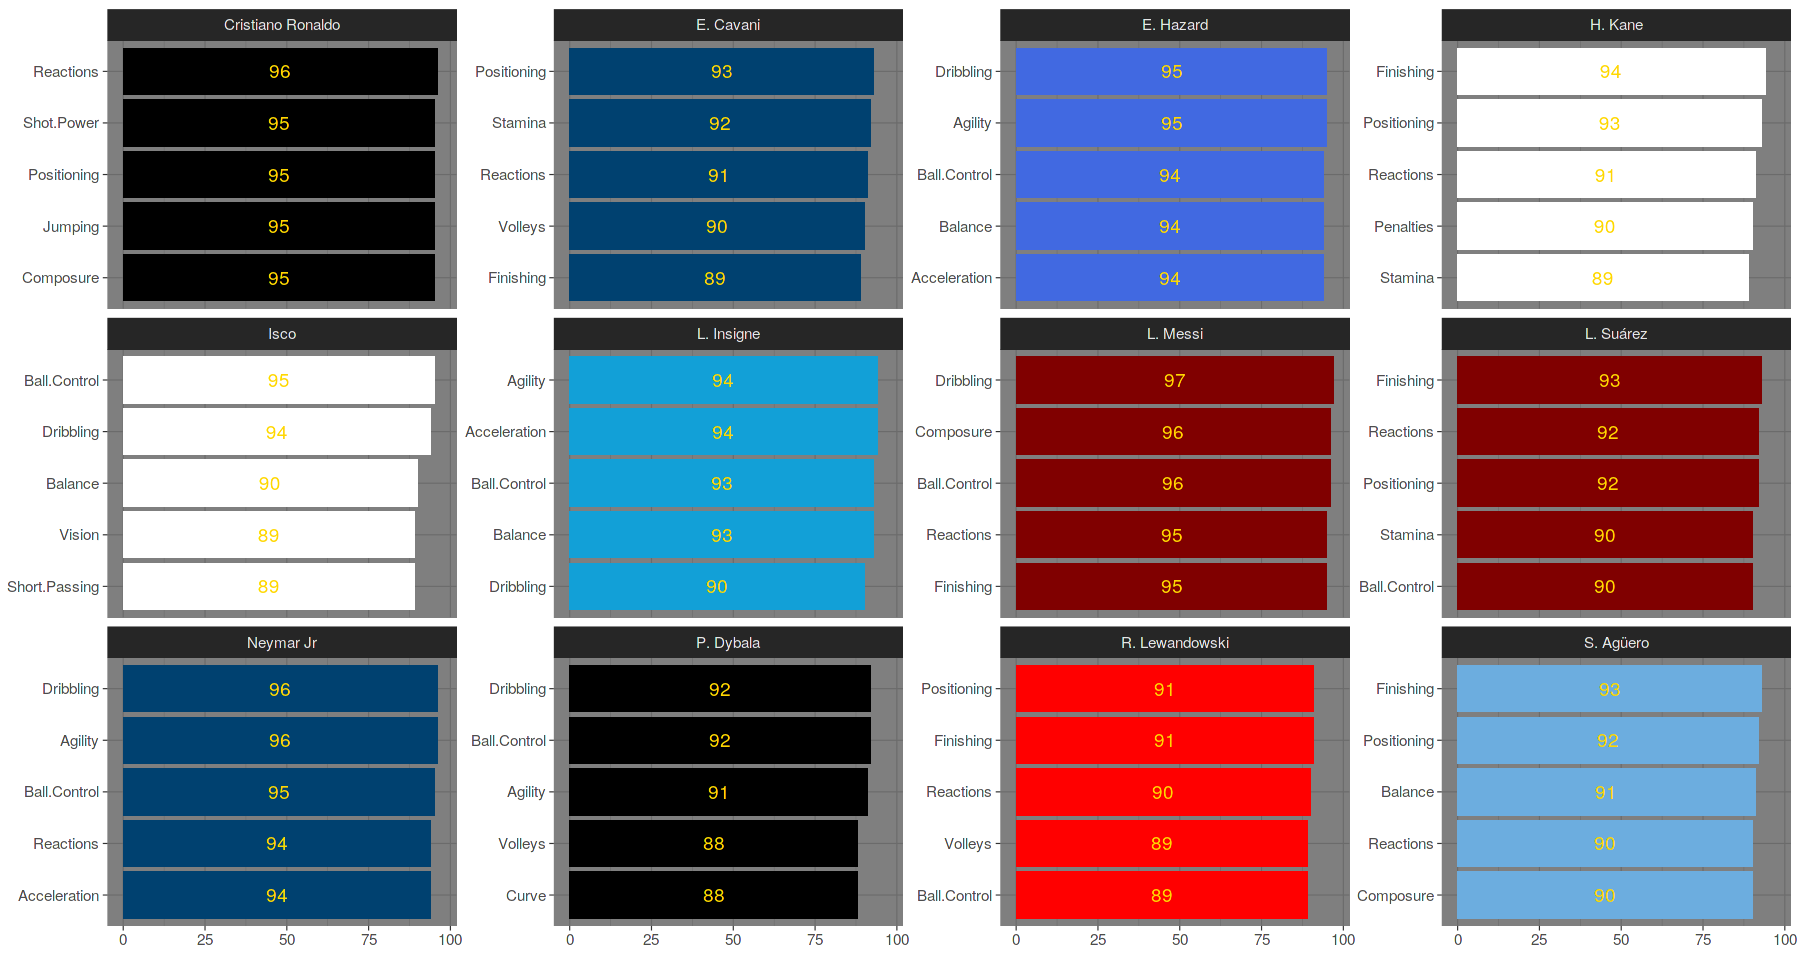

In [37]:
options(repr.plot.width = 15, repr.plot.height = 8)

df %>% 
  arrange(-Overall) %>% 
  filter(Class == "Forward") %>% 
  head(12) %>% 
  select(Name, Crossing:Sliding.Tackle) %>% 
  gather(variables, Exp, -Name) %>% 
  group_by(Name) %>%
  arrange(-Exp) %>% 
  do(head(., 5)) %>% 
  ungroup() %>% 
  mutate(variables = reorder_within(variables, Exp, Name)) %>% 
  ggplot(aes(variables, Exp, fill = Name))+
  geom_col(show.legend = FALSE)+
  geom_text(aes(label = Exp), position = position_stack(vjust = 0.5), color = "gold")+
  facet_wrap(Name~., scales = "free_y")+
  scale_x_reordered()+
  coord_flip()+
  theme_dark()+
  scale_fill_manual(values = c("black", "#004170","royalblue", "white", "white","#12A0D7","#800000", "#800000",
                               "#004170", "black","red", "#6CADDF"))+
  labs(x = NULL, y = NULL)

<a id="subsection22"></a>
## 5.13. Distribution of the Position Class in every League 

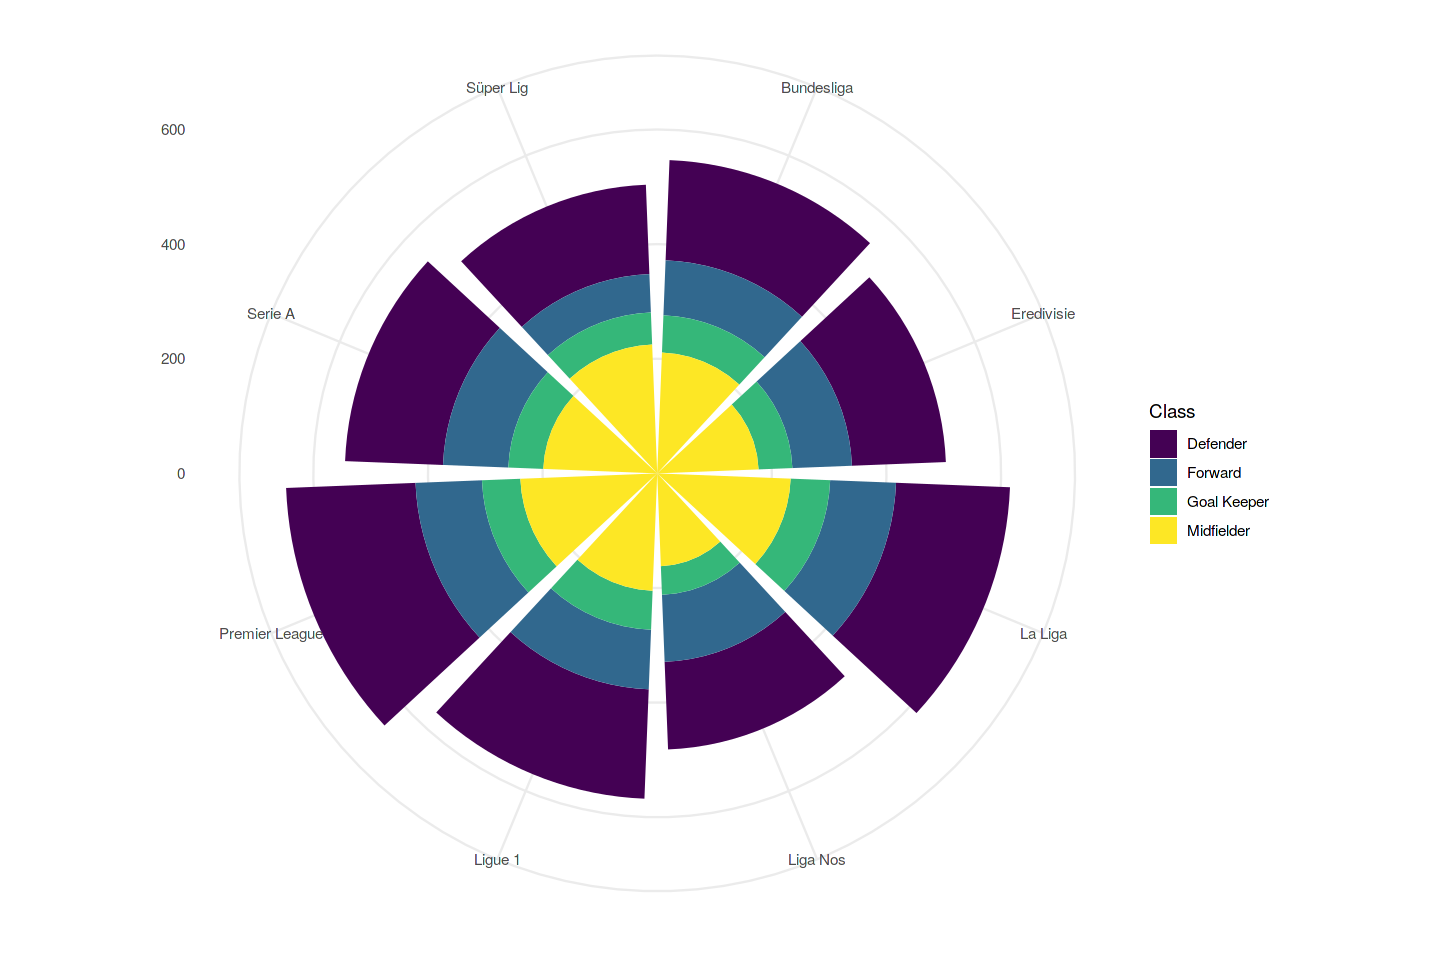

In [38]:
options(repr.plot.width = 12, repr.plot.height = 8)

df %>% group_by(League) %>% count(Class) %>% 
  ggplot(aes(League, n, fill = Class)) +
  geom_col()+
  coord_polar()+
  scale_fill_ordinal()+
  theme_minimal()+
  labs(x = NULL, y = NULL)

<a id="subsection23"></a>
## 5.14. Average summary statistics of players by position class in the Premier League 

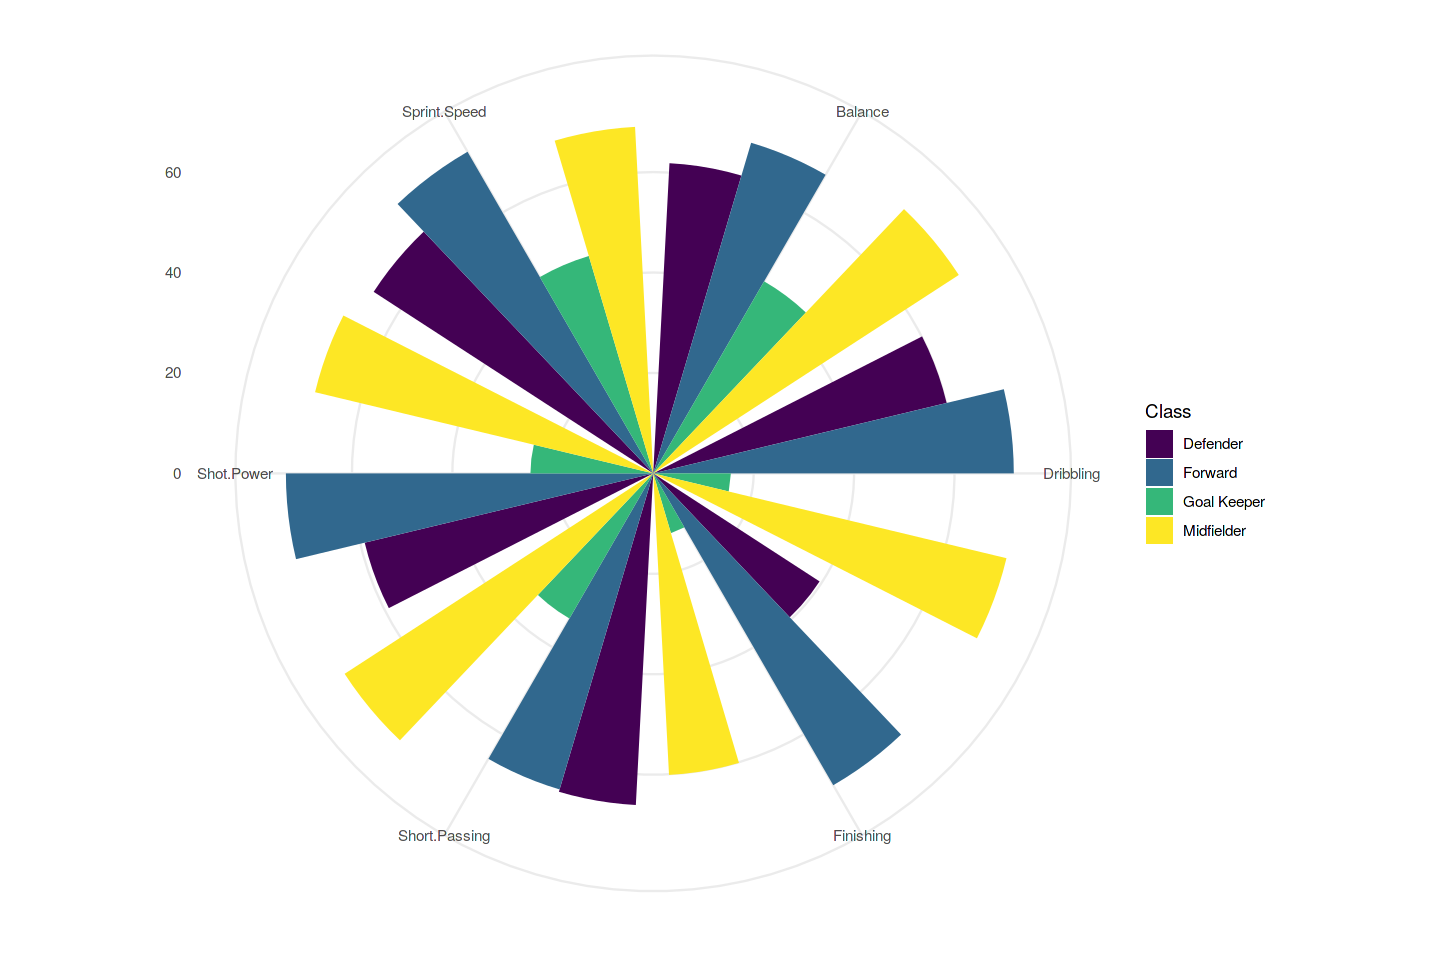

In [39]:
options(repr.plot.width = 12, repr.plot.height = 8)

df %>% 
  filter(League == "Premier League") %>% 
  select(Class, Sprint.Speed, Dribbling, Shot.Power, Finishing, Balance, Short.Passing) %>% 
  group_by(Class) %>% 
  summarise_at(vars(Sprint.Speed:Short.Passing), funs(mean)) %>% 
  gather(variables, values, -Class) %>% 
  ggplot(aes(variables, values, fill = Class))+
  geom_col(position = "dodge")+
  coord_polar()+
  scale_fill_ordinal()+
  theme_minimal()+
  labs(x = NULL, y = NULL)

<a id="subsection24"></a>
## 5.15. Similar Players

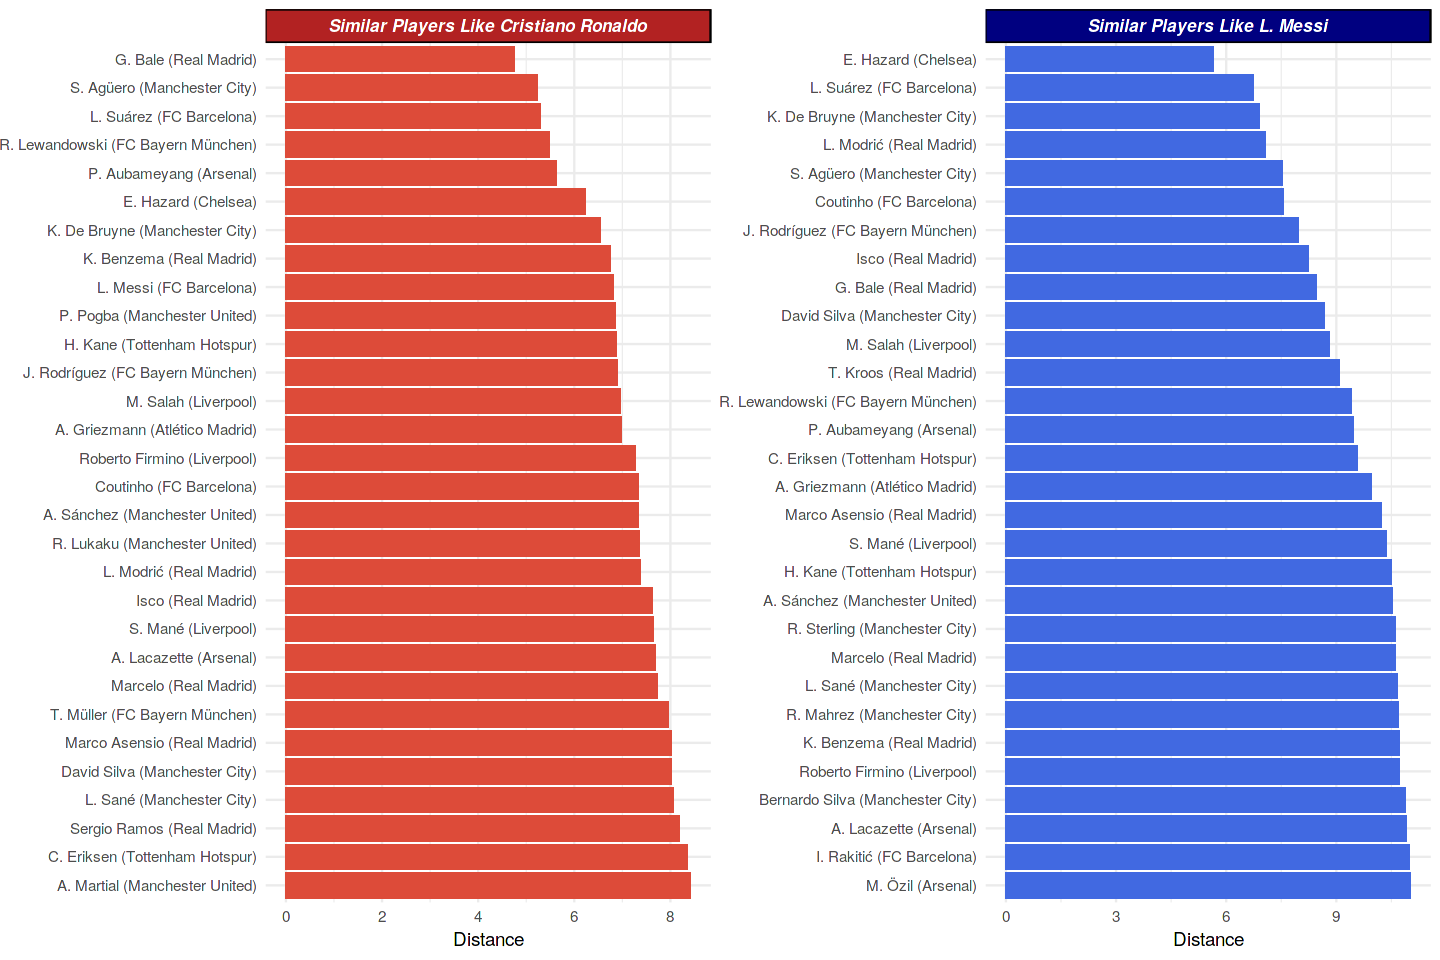

In [40]:
options(repr.plot.width = 12, repr.plot.height = 8)


similarity <- function(df, player, selectLeague, fill_variable, fill_strip,
                       input = c("Eucledian", "Maximum", "Manhattan", "Canberra", "Binary", 
                                 "Minkowski", "Pearson", "Spearman", "Kendall")
                       ){
  
  res <- NULL
    
  if(missing("df") | missing("input") | missing("player") | missing("fill_variable") | missing("selectLeague") | missing("fill_strip"))  return(res)
  if(is.null(df) | is.null(input) | is.null(player) | is.null(fill_variable) | is.null(selectLeague) | is.null(fill_strip)) return(res)
  if(length(selectLeague) < 1) return(res)

  if(input == "Euclidean"){
    distance_method <- "euclidean"
    }else if(input == "Maximum"){
      distance_method <- "maximum"
    }else if(input == "Manhattan"){
      distance_method <- "manhattan"
    }else if(input == "Canberra"){
      distance_method <- "canberra"
    }else if(input == "Minkowski"){
      distance_method <- "minkowski"
    }else if(input == "Pearson"){
      distance_method <- "pearson"
    }else if(input == "Spearman"){
      distance_method <- "spearman"
    }else if(input == "Kendall"){
      distance_method <- "kendall"
    }else{
      return(NULL)
    }
  
  plyr <- df %>% filter(Name == player)
  
  smdf <- df %>% filter(League %in% selectLeague, !Name %in% plyr$Name) %>% rbind(plyr)
  
  rwname <- paste0(smdf$Name, " (", smdf$Club, ")")
  
  smdf <- smdf %>% select_if(is.numeric) %>% select(-Jersey.Number)
  
  smdf <- apply(smdf, 2, scale)
  rownames(smdf) <- rwname
  
  smdf <- get_dist(smdf, method = distance_method)
  smdf <- fviz_dist(smdf)
  
  smdf <- smdf$data %>%
    mutate(Var1 = str_sub(Var1, start = 1, end = str_length(Var1)-1),

           
           
           Var2 = str_sub(Var2, start = 1, end = str_length(Var2)-1)) %>% 
    arrange(value) %>% 
    filter(value > 0, Var1 == rwname[length(rwname)]) %>% 
    head(30)
  
  res <- ggplot(smdf, aes(fct_reorder(Var2, desc(value)), value))+
    geom_col(fill = fill_variable)+
    coord_flip()+
    labs(y = "Distance", x = NULL)+
    theme_minimal()+
    facet_wrap(~paste0("Similar Players Like ", player))+
    theme(strip.background =element_rect(fill=fill_strip,color = "black"),
          strip.text.x = element_text(size = 10, colour = "white",face = "bold.italic"))
    
    
  return(res)
  
}


grid.arrange(
      ncol = 2,
      similarity(df, input = "Euclidean", selectLeague = c("Bundesliga", "Premier League", "La Liga"), 
                 player = "Cristiano Ronaldo", fill_variable = "#dd4b39", fill_strip = "firebrick"),
      similarity(df, input = "Euclidean", selectLeague = c("Bundesliga", "Premier League", "La Liga"), 
                 player = "L. Messi", fill_variable = "royalblue", fill_strip = "navy")
    )
    

<a id="subsection25"></a>
## 5.16. Relationship between Position and International Reputation variables

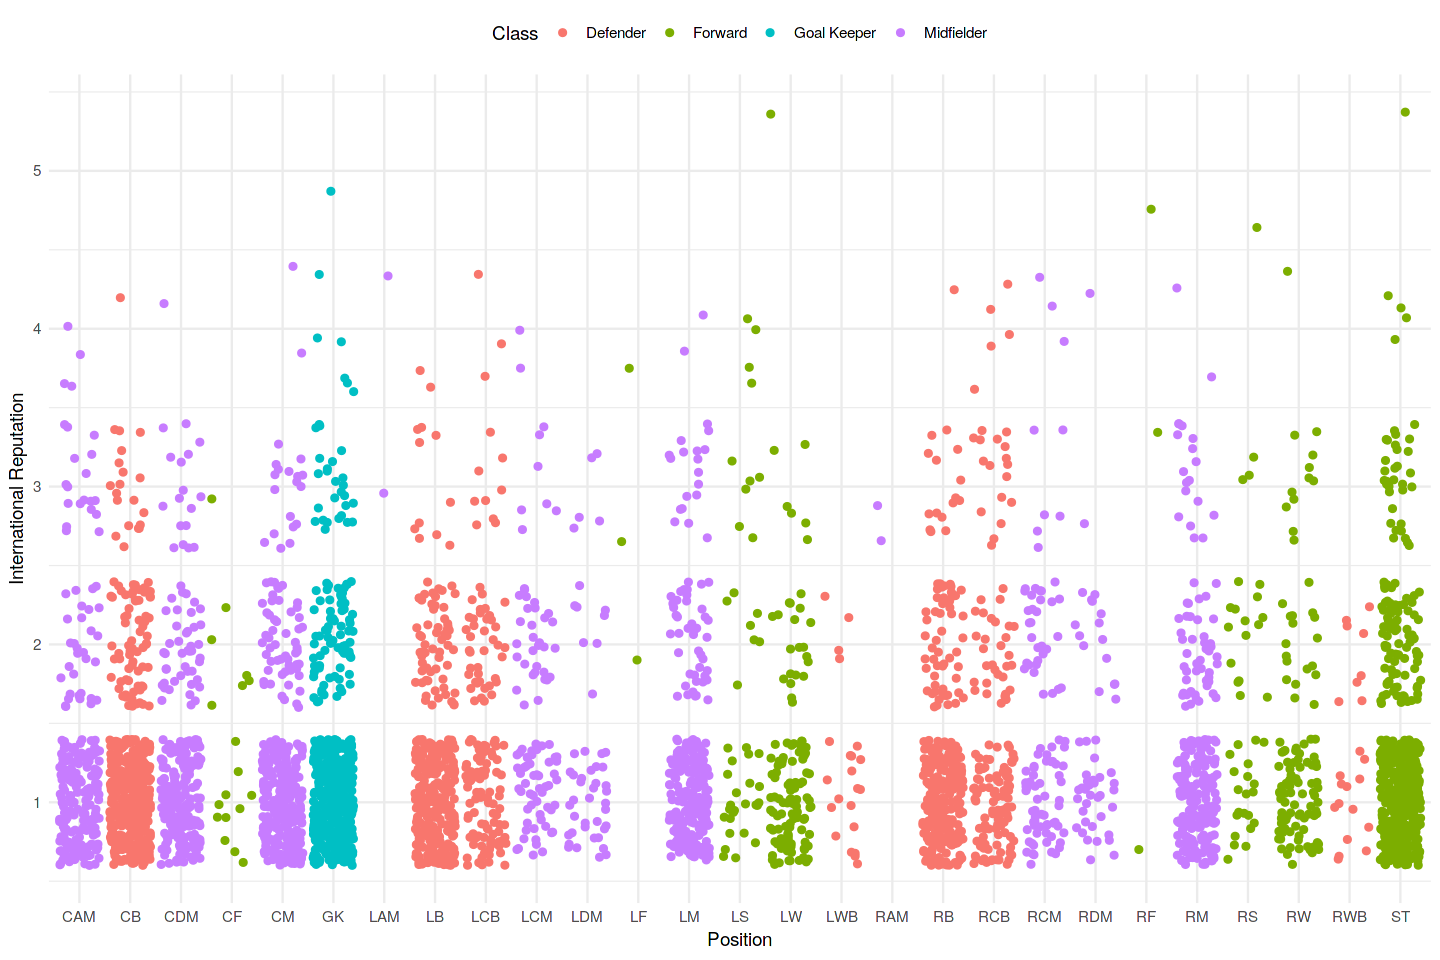

In [41]:
options(repr.plot.width = 12, repr.plot.height = 8)

df %>% 
    ggplot(aes(Position, International.Reputation, color = Class))+
    geom_jitter()+
    theme_minimal()+
    theme(
        legend.position = "top"
    )+
    labs(y = "International Reputation")

<a id="subsection26"></a>
## 5.17. Relationship between Age and Wage

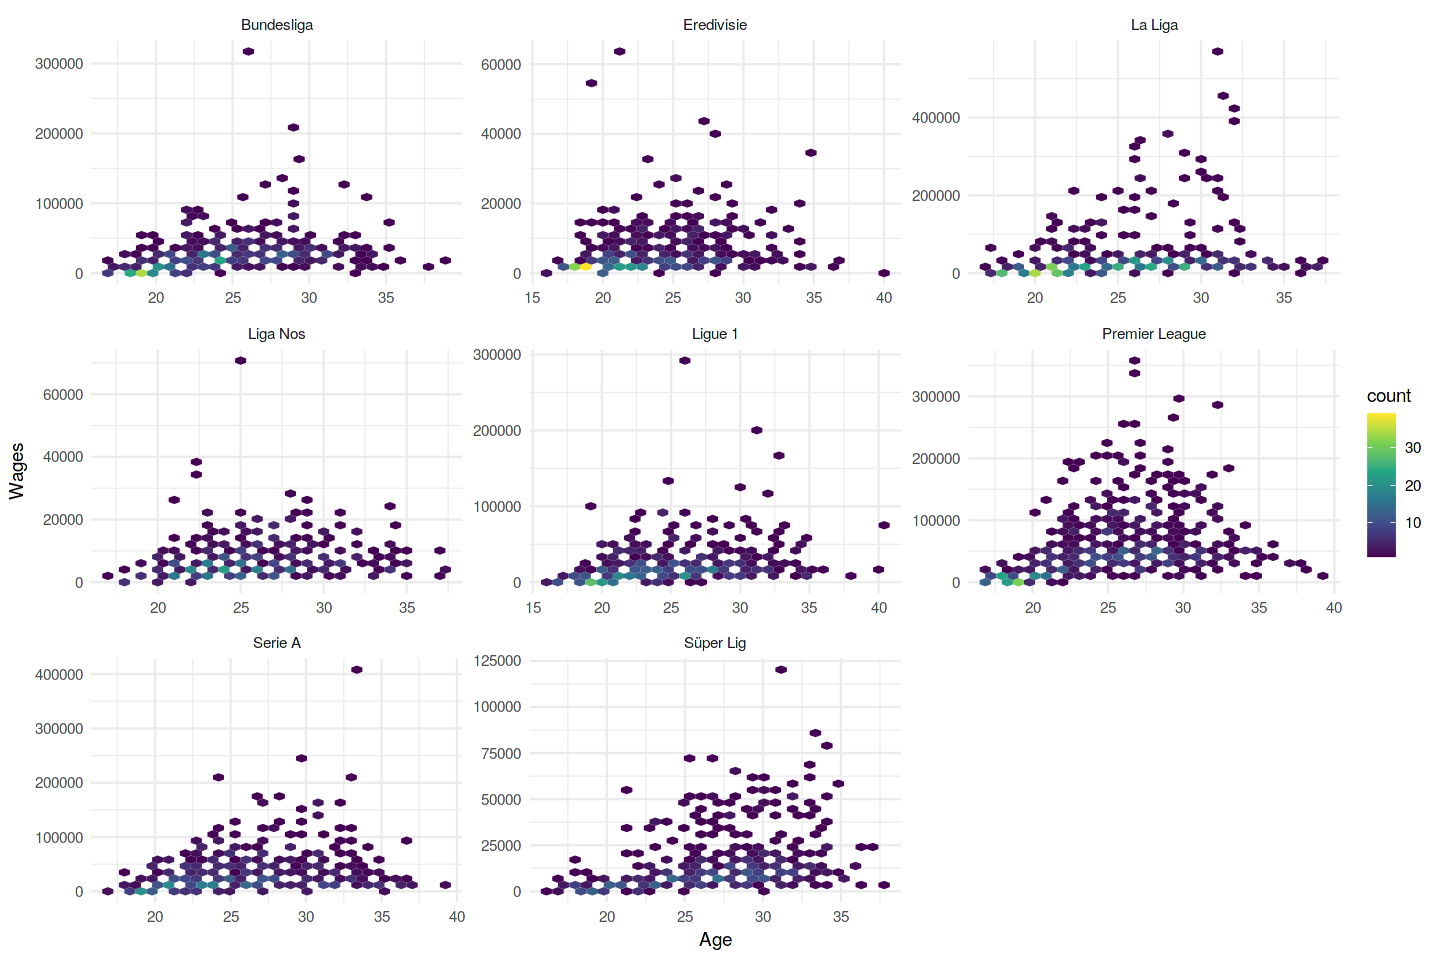

In [42]:
options(repr.plot.width = 12, repr.plot.height = 8)

ggplot(df, aes(Age, Wages))+
    geom_hex()+
    facet_wrap(League~., scales = "free")+
    scale_fill_viridis_c()+
    theme_minimal()


<a id="subsection27"></a>
## 5.17.PCA Score vs Overall Variable for Forward Players

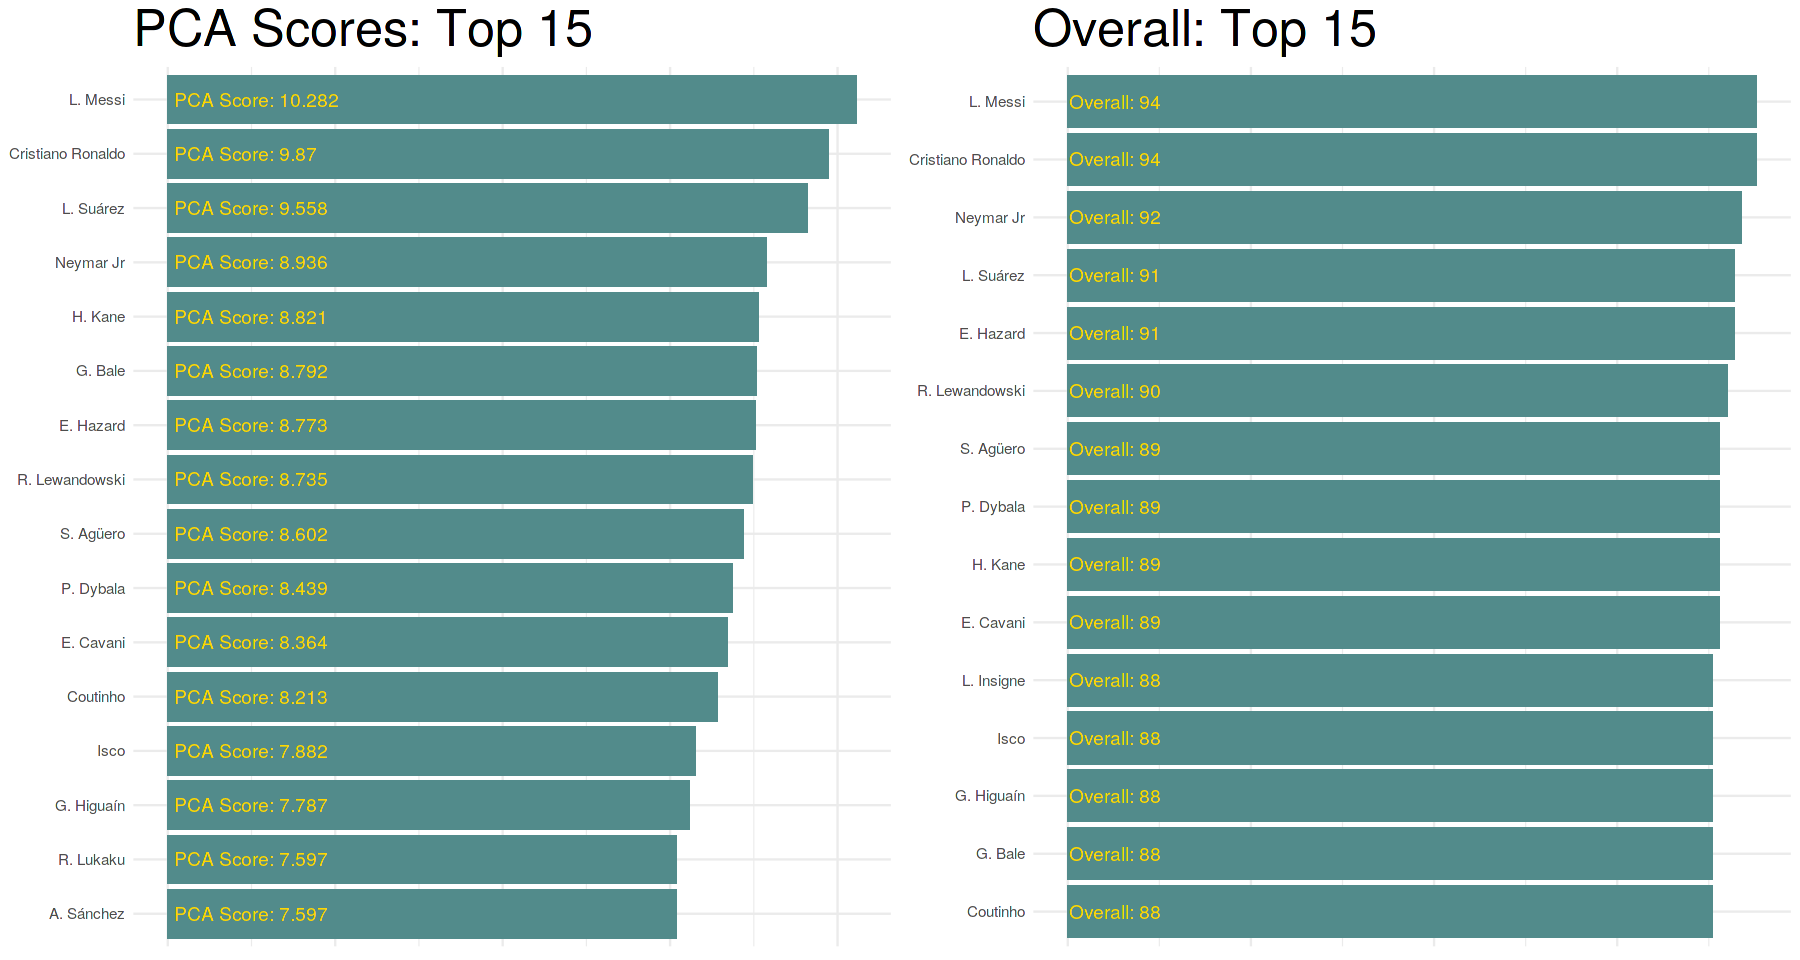

In [43]:
pca_df <- df %>% 
    filter(Class == "Forward") %>% 
    select(Name, Position, Club, Class, Age, Overall, Potential, Values, Wages, Crossing:Sliding.Tackle) 
    
pca_df2 <- pca_df %>% 
    select(-Club, -Class, -Position, -Overall) %>% 
    mutate(Name = paste0(1:nrow(pca_df), "-", Name)) %>%
    mutate_at(vars(Age:Sliding.Tackle), funs(scale)) %>% 
    column_to_rownames("Name")

pca_df2 <- prcomp(pca_df2, scale = FALSE)
  
pca_df2$rotation <- -pca_df2$rotation
pca_df2$x <- -pca_df2$x

pl_avo <- pca_df2$sdev^2 / sum(pca_df2$sdev^2)
  
# Player PCA Score
pca_df$`PCA Score` <- rowSums(pca_df2$x[,1:6] * t(matrix(pl_avo[1:6], 6, nrow(pca_df))))

number <- 3.94

pca_df3 <- pca_df %>% 
    mutate(`PCA Score` = `PCA Score`) %>% 
    select(Name, Overall, Age, Position, Class, Club, `PCA Score`) %>% 
    arrange(-`PCA Score`) %>% 
    mutate(`PCA Score` = round(`PCA Score` + number, digits = 3))

options(repr.plot.width = 15, repr.plot.height = 8)

grid.arrange(
pca_df3 %>% top_n(n = 15, wt = `PCA Score`) %>% 
      ggplot(aes(reorder(Name, `PCA Score`), `PCA Score`, label = paste0("PCA Score: ", `PCA Score`)))+
      geom_col(fill = "darkslategray4")+
      geom_text(hjust = "left", color = "gold", y=0.1)+
      coord_flip()+
      theme_minimal()+
      theme(legend.position = "bottom", axis.text.x = element_blank(), title = element_text(size = 25))+
      labs(title = "PCA Scores: Top 15", x = NULL, y = NULL),

pca_df3 %>% top_n(n = 15, wt = Overall) %>% 
    ggplot(aes(reorder(Name, Overall), Overall, label = paste0("Overall: ", Overall)))+
    geom_col(fill = "darkslategray4")+
    geom_text(hjust = "left", color = "gold", y=0.1)+
    coord_flip()+
    theme_minimal()+
    theme(legend.position = "bottom", axis.text.x = element_blank(), title = element_text(size = 25))+
    labs(title = "Overall: Top 15", x = NULL, y = NULL),
    
    ncol = 2
)

<a id="subsection28"></a>
## 5.18.Clustering Forward Players with K-Means

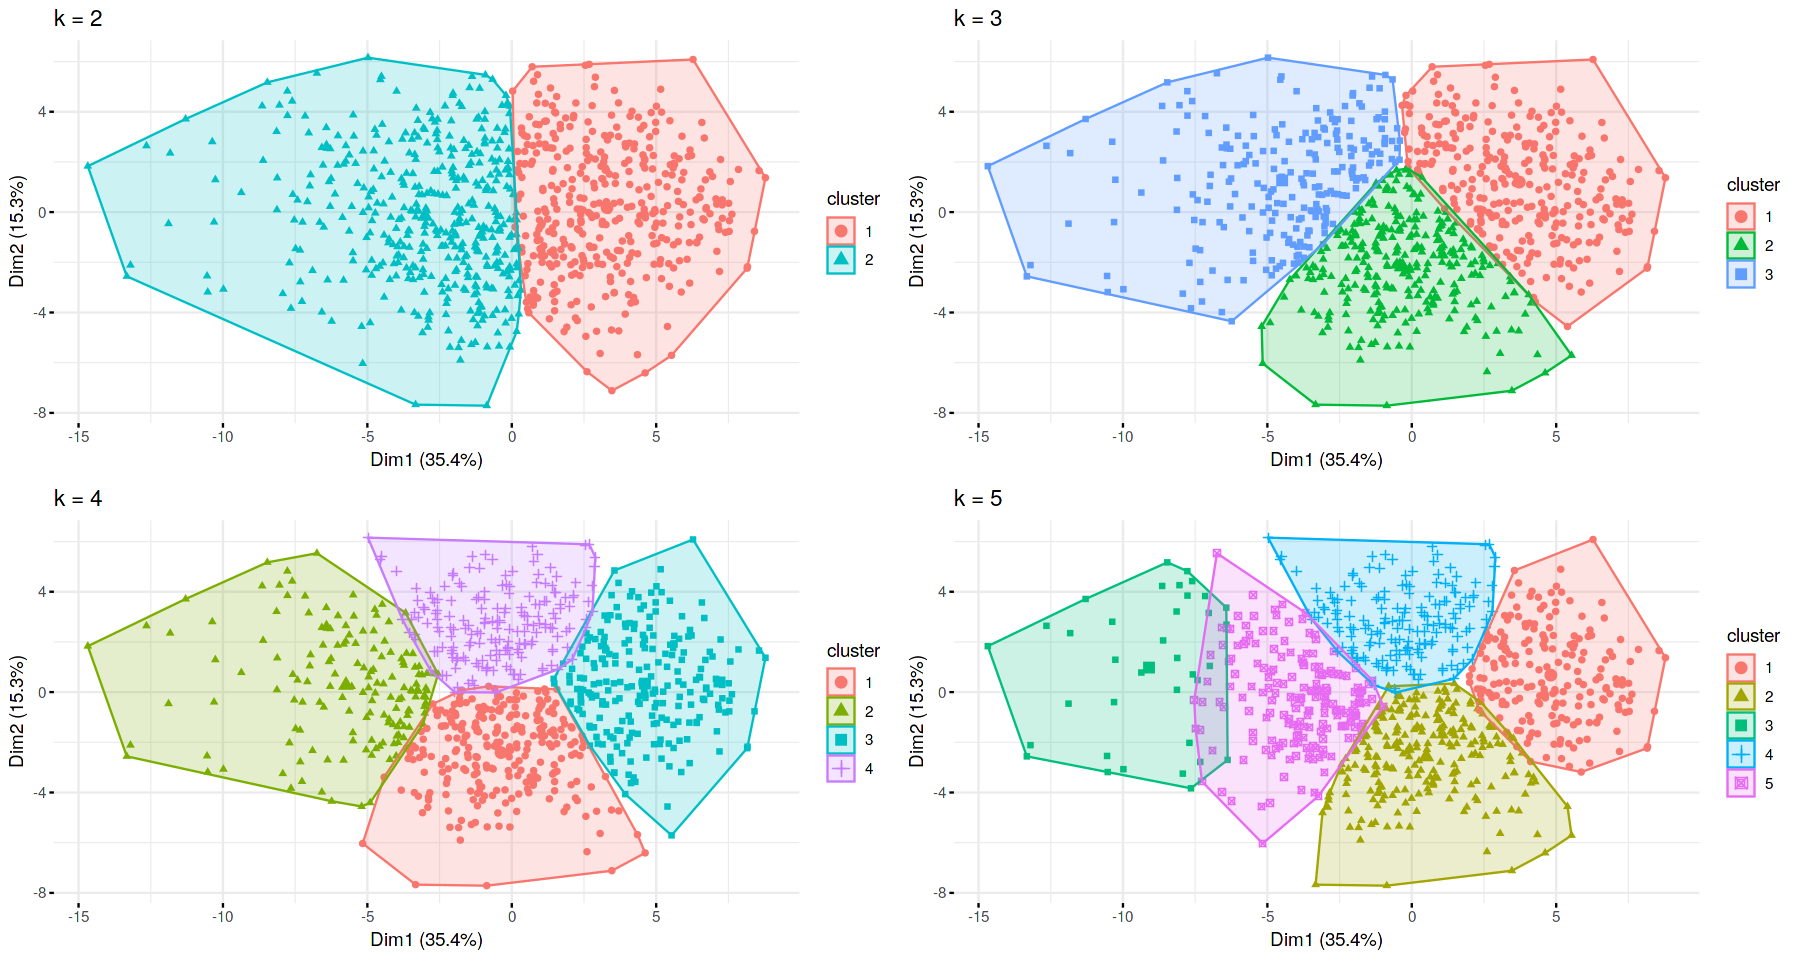

In [44]:
km <- df %>% filter(Class == "Forward") 
  
x <- km
  
x$ID <- 1:nrow(x)
  
row.names(x) <- paste(x$ID, x$Name, sep = "-")
x$Name <- NULL
x$ID <- NULL
  
x <- x %>% select_if(is.numeric) %>% select(-Jersey.Number, -Skill.Moves) %>% na.omit()
  
x <- apply(x, 2, scale)
  
x <- as.data.frame(x)
  
k2 <- kmeans(x, center = 2, nstart = 25)   
k3 <- kmeans(x, centers = 3, nstart = 25)
k4 <- kmeans(x, centers = 4, nstart = 25)
k5 <- kmeans(x, centers = 5, nstart = 25)
  
p1 <- fviz_cluster(k2, geom = "point", data = x, ggtheme = theme_minimal())+ggtitle("k = 2")
p2 <- fviz_cluster(k3, geom = "point", data = x, ggtheme = theme_minimal())+ggtitle("k = 3")
p3 <- fviz_cluster(k4, geom = "point", data = x, ggtheme = theme_minimal())+ggtitle("k = 4")
p4 <- fviz_cluster(k5, geom = "point", data = x, ggtheme = theme_minimal())+ggtitle("k = 5")

options(repr.plot.width = 15, repr.plot.height = 8)
grid.arrange(p1,p2,p3,p4)

<a id="subsection29"></a>
## 5.19.Average Overall & Age

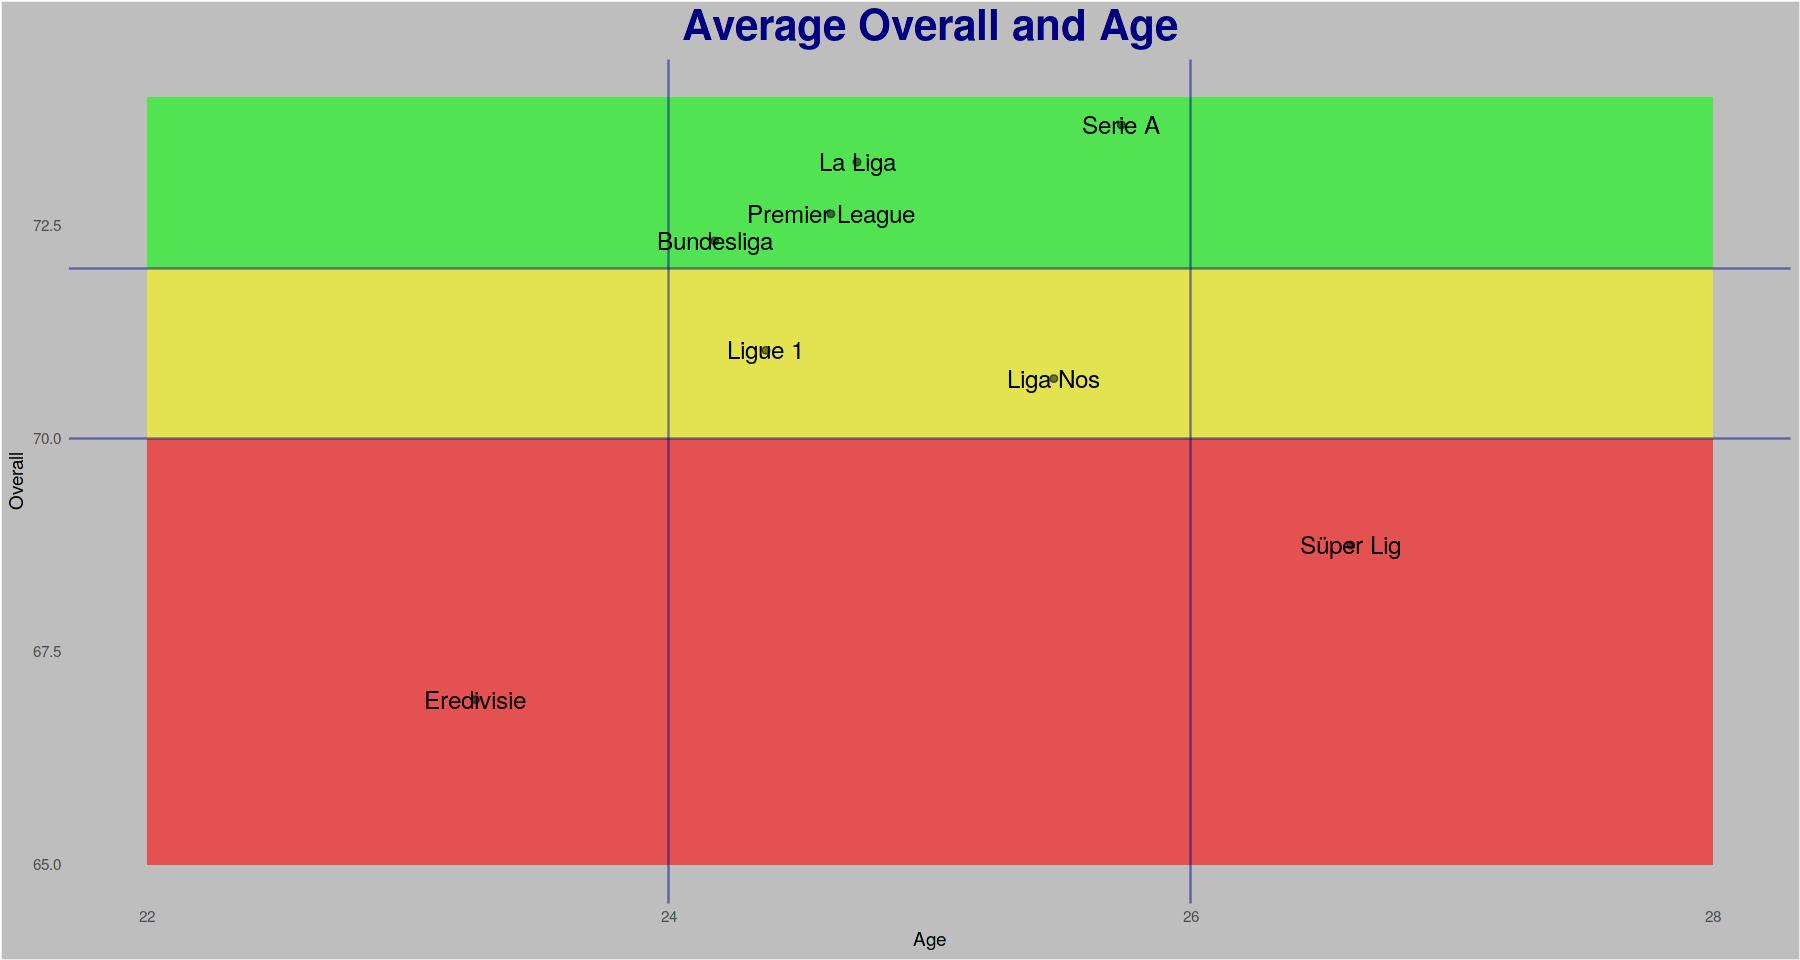

In [45]:
df %>%
    group_by(League)%>%
    summarise(Age = mean(Age), Overall = mean(Overall))%>%
    ungroup()%>%
    ggplot(aes(Age, Overall, label = League))+
    geom_rect(aes(xmin =22, xmax=28, ymin=65, ymax=70), fill = "red", alpha = 0.1)+
    geom_rect(aes(xmin =22, xmax=28, ymin=72, ymax=74), fill = "green", alpha = 0.1)+
    geom_rect(aes(xmin =22, xmax=28, ymin=70, ymax=72), fill = "yellow", alpha = 0.1)+
    geom_vline(aes(xintercept = 24), alpha = 0.5, color = "navy")+
    geom_vline(aes(xintercept = 26), alpha = 0.5, color = "navy")+
    geom_hline(aes(yintercept = 72), alpha = 0.5, color = "navy")+
    geom_hline(aes(yintercept = 70), alpha = 0.5, color = "navy")+
    geom_point(alpha = 0.5)+
    geom_text(size = 5)+
    ylim(65,74)+xlim(22,28)+
    theme(
        plot.background = element_rect(fill = "gray"),
        panel.background = element_rect(fill = "gray"),
        panel.grid = element_blank(),
        axis.ticks = element_blank(),
        plot.title = element_text(hjust = 0.5, size = 25, color = "navy", face = "bold")
    )+
    labs(title = "Average Overall and Age")

<a id="subsection30"></a>
## 5.20.Top 10 Wonderkid

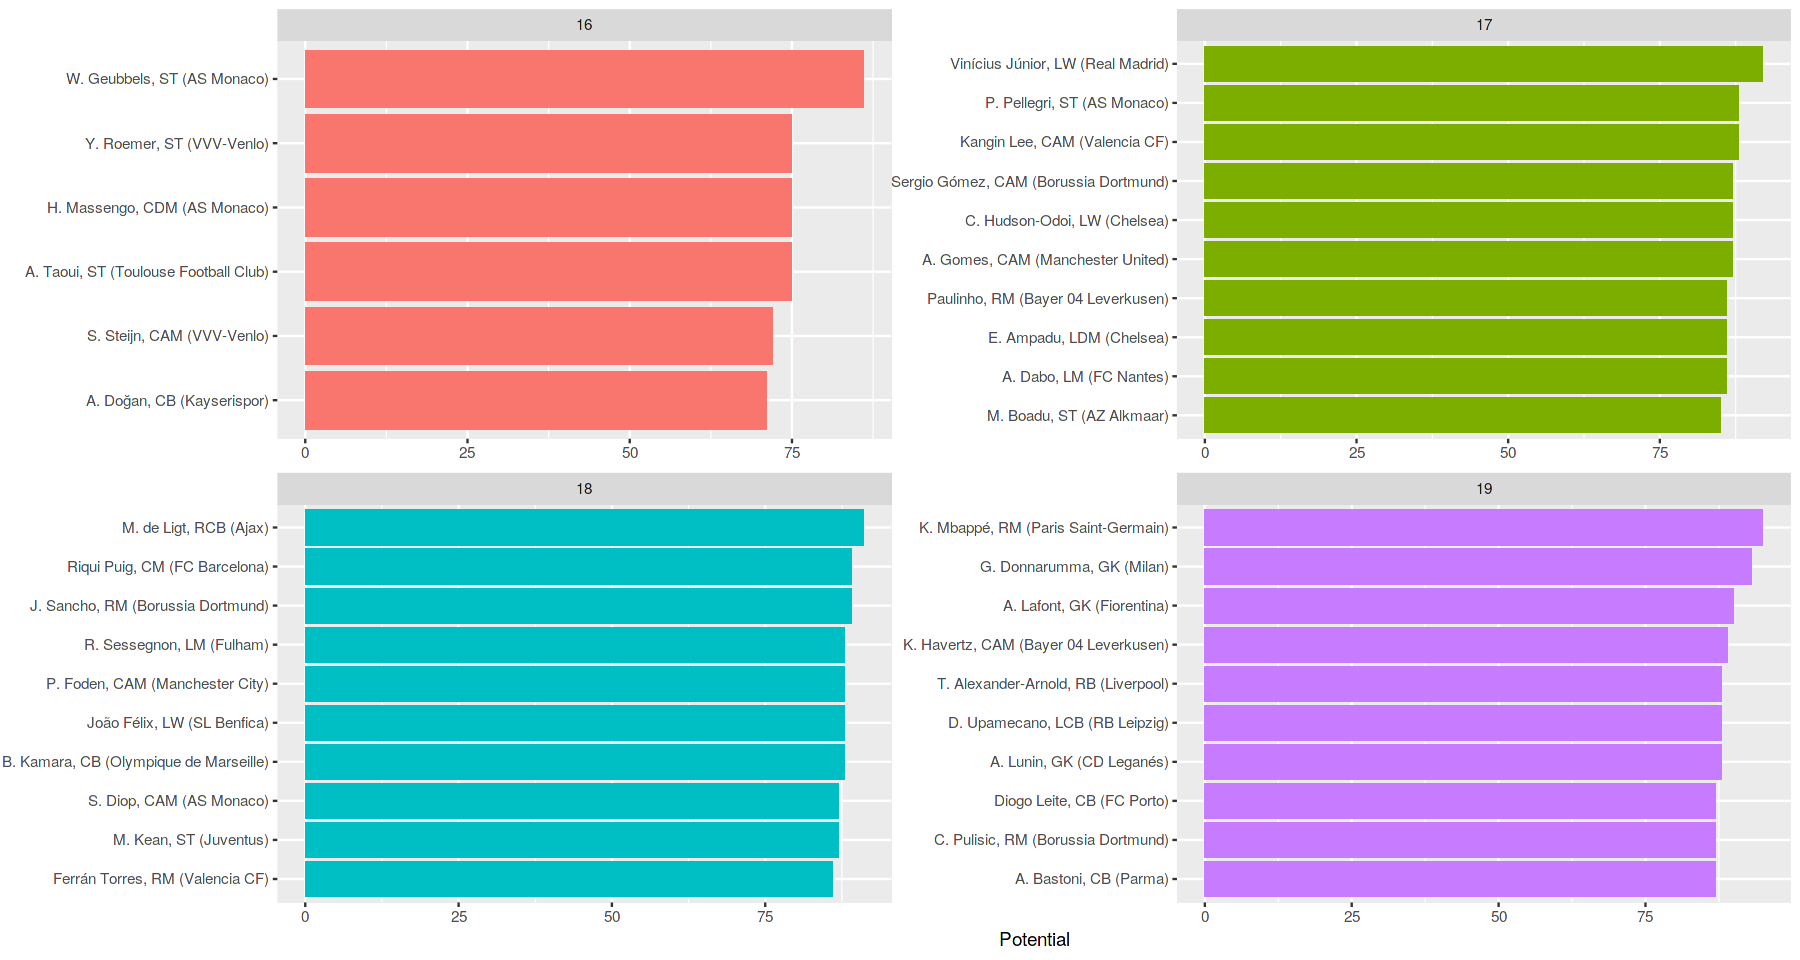

In [46]:
df %>% 
    filter(Age < 20, Potential > 69) %>% 
    arrange(-Potential)%>% 
    group_by(Age)%>%
    do(head(.,10))%>%
    ggplot(aes(reorder(paste0(paste(Name, Position, sep =", "), " (",Club, ")"), Potential), Potential, fill = as.factor(Age)))+
    geom_col(show.legend = FALSE)+
    coord_flip()+
    facet_wrap(Age~., scales = "free")+
    labs(x = NULL)

<a id="section6"></a>
# 6. MY OTHER NOTEBOOKS ABOUT SPORTS ANALYTICS

<div class="row">
  <div class="col-sm-3">
    <div class="card">
      <div class="card-body" style="width: 18rem;">
        <h5 class="card-title">FIFA 19 Dashboard with R Shiny</h5>
          <img src="https://community.rstudio.com/uploads/default/original/3X/f/f/ff96a5b7fc694775f34d41d1c89e104cb8af80c9.jpeg" class="card-img-top" alt="...">
        <hr>
        <a href="https://www.kaggle.com/ekrembayar/fifa-19-dashboard-with-r-shiny" class="btn btn-primary" style="color:white;">Go to Notebook</a>
      </div>
    </div>
  </div>
  <div class="col-sm-3">
    <div class="card">
      <div class="card-body" style="width: 18rem;">
        <h5 class="card-title">THE LAST DANCE: Data Visualization</h5>
          <img src="https://www.kolpaper.com/wp-content/uploads/2020/05/The-Last-Dance-Wallpaper-2.jpg" class="card-img-top" alt="...">
        <hr>
        <a href="https://www.kaggle.com/ekrembayar/the-last-dance-data-visualization" class="btn btn-primary" style="color:white;">Go to Notebook</a>
      </div>
    </div>
  </div>
  <div class="col-sm-3">
    <div class="card">
      <div class="card-body" style="width: 18rem;">
        <h5 class="card-title">FIFA World Cup 18: Event Data Visualization</h5>
          <img src="https://s01.sgp1.digitaloceanspaces.com/large/898485-zygxomeltv-1531717418.jpg" class="card-img-top" alt="...">
        <hr>
        <a href="https://www.kaggle.com/ekrembayar/fifa-world-cup-event-data-shot-pass-avg-pos" class="btn btn-primary" style="color:white;">Go to Notebook</a>
      </div>
    </div>
  </div>
  <div class="col-sm-3">
    <div class="card">
      <div class="card-body" style="width: 18rem;">
        <h5 class="card-title">Premier League 19-20 Data Analysis & Visualization</h5>
          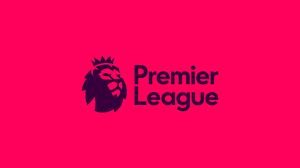
        <hr>
        <a href="https://www.kaggle.com/ekrembayar/premier-league-19-20-data-analysis-visualization" class="btn btn-primary" style="color:white;">Go to Notebook</a>
      </div>
    </div>
  </div>
    
    
    
</div>

<center><img
src="https://thumbs.gfycat.com/WickedAfraidHoneybadger-size_restricted.gif" style="width:100%;height:100%;">
</center>
